In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [2]:
df = pd.read_csv('2025 03 21 - EPFL Fin413 - Project Dataset Sendout.csv', 
                 index_col = 0, #Take the collumn date as the index of the dataframe
                 parse_dates=True) #convert the date-looking strings into a real datetime

In [3]:
df

,ADA-USD,BCH-USD,BTC-USD,DOGE-USD,ETH-USD,LINK-USD,LTC-USD,MANA-USD,XLM-USD,XRP-USD,SPXT,XCMP,SOFR,VIX
Date,,,,,,,,,,,,,,
01.10.2017,0.02519,416.40,4403.09,0.001076,303.95,0.4365,54.80,0.01817,0.01387,0.2083,4887.97,7447.572790,0.993372,9.51
02.10.2017,0.02588,419.84,4401.32,0.001051,296.81,0.3574,53.29,0.01448,0.01300,0.2031,4906.92,7471.384512,0.993401,9.45
03.10.2017,0.02084,402.17,4314.18,0.001023,291.81,0.3455,52.15,0.01689,0.01241,0.2033,4917.73,7489.156529,0.993432,9.51
04.10.2017,0.02189,355.84,4218.66,0.001014,291.68,0.3920,51.22,0.01445,0.01181,0.2135,4924.19,7493.646686,0.993464,9.63
05.10.2017,0.02152,354.36,4321.44,0.001007,294.99,0.4050,51.64,0.01353,0.01449,0.2380,4952.85,7551.916900,0.993496,9.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16.03.2025,0.70480,333.13,82572.37,0.168200,1886.94,13.3700,90.25,0.25590,0.26270,2.2940,12414.28,21723.342040,1.185178,21.77
17.03.2025,0.71770,337.56,84025.12,0.173400,1926.41,14.0200,92.31,0.27660,0.27300,2.3380,12494.82,21790.345180,1.185603,20.51
18.03.2025,0.70160,335.26,82716.74,0.168000,1931.53,13.9100,90.05,0.26930,0.27340,2.2850,12362.16,21418.073100,1.185745,21.70


In [4]:
# 1. Compute log‐prices for your crypto & equity series
#Moreover, given the assumption that we have access to available futures contracts even for VIX AND SOFR 
#we compute return and consider all as tradable assets.


price_cols = [
    'ADA-USD','BCH-USD','BTC-USD','DOGE-USD','ETH-USD',
    'LINK-USD','LTC-USD','MANA-USD','XLM-USD','XRP-USD',
    'SPXT','XCMP', "VIX", "SOFR"
]
log_prices = np.log(df[price_cols]).add_suffix('_logPrice')


log_prices.head()



,ADA-USD_logPrice,BCH-USD_logPrice,BTC-USD_logPrice,DOGE-USD_logPrice,ETH-USD_logPrice,LINK-USD_logPrice,LTC-USD_logPrice,MANA-USD_logPrice,XLM-USD_logPrice,XRP-USD_logPrice,SPXT_logPrice,XCMP_logPrice,VIX_logPrice,SOFR_logPrice
Date,,,,,,,,,,,,,,
01.10.2017,-3.681308,6.031646,8.390062,-6.834505,5.716863,-0.828967,4.003690,-4.007983,-4.278027,-1.568776,8.494532,8.915643,2.252344,-0.006650
02.10.2017,-3.654285,6.039874,8.389660,-6.858013,5.693092,-1.028900,3.975749,-4.234987,-4.342806,-1.594057,8.498402,8.918836,2.246015,-0.006621
03.10.2017,-3.870881,5.996875,8.369663,-6.885016,5.676103,-1.062763,3.954124,-4.081034,-4.389253,-1.593073,8.500602,8.921211,2.252344,-0.006589
04.10.2017,-3.821725,5.874481,8.347273,-6.893852,5.675657,-0.936493,3.936130,-4.237061,-4.438809,-1.544118,8.501915,8.921811,2.264883,-0.006557
05.10.2017,-3.838773,5.870313,8.371344,-6.900780,5.686941,-0.903868,3.944297,-4.302846,-4.234297,-1.435485,8.507718,8.929557,2.218116,-0.006526


In [11]:
#Now let's assessing the quality of the data:

#Count the number of Nan per collumn:
nan_counts_df = df.isna().sum() 
print(nan_counts_df)


#Count the number of zero per collumn
zero_counts_df = (df == 0).sum()
print(zero_counts_df)

ADA-USD     0
BCH-USD     0
BTC-USD     0
DOGE-USD    0
ETH-USD     0
LINK-USD    0
LTC-USD     0
MANA-USD    0
XLM-USD     0
XRP-USD     0
SPXT        0
XCMP        0
SOFR        0
VIX         0
dtype: int64
ADA-USD     0
BCH-USD     0
BTC-USD     0
DOGE-USD    0
ETH-USD     0
LINK-USD    0
LTC-USD     0
MANA-USD    0
XLM-USD     0
XRP-USD     0
SPXT        0
XCMP        0
SOFR        0
VIX         0
dtype: int64


In [12]:
#Now computing linear return and log return

price_cols = [
    'ADA-USD','BCH-USD','BTC-USD','DOGE-USD','ETH-USD',
    'LINK-USD','LTC-USD','MANA-USD','XLM-USD','XRP-USD',
    'SPXT','XCMP',"VIX", "SOFR"
]

#Arithmetic returns:
arith_returns = df[price_cols].pct_change()

#Log returns: 
log_returns   = np.log(df[price_cols]).diff()


#Concatenating in a dataframe
returns = pd.concat([
    arith_returns.add_suffix(' /simple'),
    log_returns.add_suffix('/log'),
], axis=1).dropna() #dropna() because .pct_change() introduces a Nan in the very first row


In [13]:
#Count the number of Nan per collumn:
nan_counts = returns.isna().sum() 
print(nan_counts)

#Count the number of zero per collumn
zero_counts = (returns == 0).sum()
print(zero_counts)

ADA-USD /simple     0
BCH-USD /simple     0
BTC-USD /simple     0
DOGE-USD /simple    0
ETH-USD /simple     0
LINK-USD /simple    0
LTC-USD /simple     0
MANA-USD /simple    0
XLM-USD /simple     0
XRP-USD /simple     0
SPXT /simple        0
XCMP /simple        0
VIX /simple         0
SOFR /simple        0
ADA-USD/log         0
BCH-USD/log         0
BTC-USD/log         0
DOGE-USD/log        0
ETH-USD/log         0
LINK-USD/log        0
LTC-USD/log         0
MANA-USD/log        0
XLM-USD/log         0
XRP-USD/log         0
SPXT/log            0
XCMP/log            0
VIX/log             0
SOFR/log            0
dtype: int64
ADA-USD /simple       9
BCH-USD /simple       1
BTC-USD /simple       0
DOGE-USD /simple     17
ETH-USD /simple       1
LINK-USD /simple      4
LTC-USD /simple       8
MANA-USD /simple     11
XLM-USD /simple      18
XRP-USD /simple      14
SPXT /simple        850
XCMP /simple        850
VIX /simple         838
SOFR /simple        804
ADA-USD/log           9
BCH-USD/log

As we can see there are a lot of zero value. Especially for equity indices and Vix / SOFR. This is explained by the fact that there is no trading of traditional asset on Saturday and Sunday. We will treat this issue.

D)

SPXT, XCMP, SOFR, and VIX show zero returns over weekends, as traditional markets are closed on Saturdays and Sundays. Unlike cryptocurrencies that are traded 24/7. Weekend zero‐returns in equities and rates artificially suppress their measured co‐movements with cryptocurrencies. Cryptos move nonstop, but traditional assets sit at zero, pulling down correlations. Including non-trading days with zero returns biases the volatility estimate of traditional assets downward, as the standard deviation is diluted by flat returns. Finally, mixing weekend and weekday returns introduces a structural break in the return process, violating the i.i.d. assumption typically required for time-series models.

In [14]:
#Drop the prices the weekend

df.index = pd.to_datetime(df.index, dayfirst = True) #Convert the index to datetime with the right format

is_weekday = df.index.dayofweek < 5 #We filter only the weekdays

prices_bd = df.loc[is_weekday]

#Recompute the right returns:

#Arithmetic returns:
arith_returns_bd = prices_bd[price_cols].pct_change()

#Log returns: 
log_returns_bd   = np.log(prices_bd[price_cols]).diff()


#Concatenating in a dataframe
returns_bd = pd.concat([
    arith_returns_bd.add_suffix(' /simple'),
    log_returns_bd.add_suffix('/log'),
], axis=1).dropna() #dropna() because .pct_change() introduces a Nan in the very first row

returns_bd.head()

,ADA-USD /simple,BCH-USD /simple,BTC-USD /simple,DOGE-USD /simple,ETH-USD /simple,LINK-USD /simple,LTC-USD /simple,MANA-USD /simple,XLM-USD /simple,XRP-USD /simple,...,ETH-USD/log,LINK-USD/log,LTC-USD/log,MANA-USD/log,XLM-USD/log,XRP-USD/log,SPXT/log,XCMP/log,VIX/log,SOFR/log
Date,,,,,,,,,,,,,,,,,,,,,
2017-10-03,-0.194745,-0.042087,-0.019799,-0.026641,-0.016846,-0.033296,-0.021392,0.166436,-0.045385,0.000985,...,-0.016989,-0.033863,-0.021625,0.153953,-0.046447,0.000984,0.002201,0.002376,0.006329,0.000032
2017-10-04,0.050384,-0.115200,-0.022141,-0.008798,-0.000445,0.134588,-0.017833,-0.144464,-0.048348,0.050172,...,-0.000446,0.126269,-0.017994,-0.156027,-0.049556,0.048954,0.001313,0.000599,0.012539,0.000032
2017-10-05,-0.016903,-0.004159,0.024363,-0.006903,0.011348,0.033163,0.008200,-0.063668,0.226926,0.114754,...,0.011284,0.032625,0.008166,-0.065785,0.204512,0.108634,0.005803,0.007746,-0.046767,0.000032
2017-10-06,-0.140799,0.025370,0.011686,0.016882,0.045222,0.155556,0.008521,-0.398374,0.268461,-0.019328,...,0.044229,0.144581,0.008484,-0.508119,0.237804,-0.019517,-0.000759,0.000747,0.048842,0.000032
2017-10-09,0.193618,-0.138517,0.092762,-0.046875,-0.036909,-0.191026,-0.038402,0.778870,-0.040261,0.071551,...,-0.037607,-0.211988,-0.039159,0.575978,-0.041094,0.069107,-0.001806,-0.001587,0.068094,0.000095


In [15]:
#Count the number of zero per collumn
zero_counts_week = (returns_bd == 0).sum()
print(zero_counts_week)

#The number of zero return is now significantly smaller for SPXT / XCMP / SOFR and VIX

ADA-USD /simple      6
BCH-USD /simple      1
BTC-USD /simple      0
DOGE-USD /simple    13
ETH-USD /simple      1
LINK-USD /simple     3
LTC-USD /simple      4
MANA-USD /simple     5
XLM-USD /simple     11
XRP-USD /simple     13
SPXT /simple        72
XCMP /simple        72
VIX /simple         60
SOFR /simple        78
ADA-USD/log          6
BCH-USD/log          1
BTC-USD/log          0
DOGE-USD/log        13
ETH-USD/log          1
LINK-USD/log         3
LTC-USD/log          4
MANA-USD/log         5
XLM-USD/log         11
XRP-USD/log         13
SPXT/log            72
XCMP/log            72
VIX/log             60
SOFR/log            78
dtype: int64


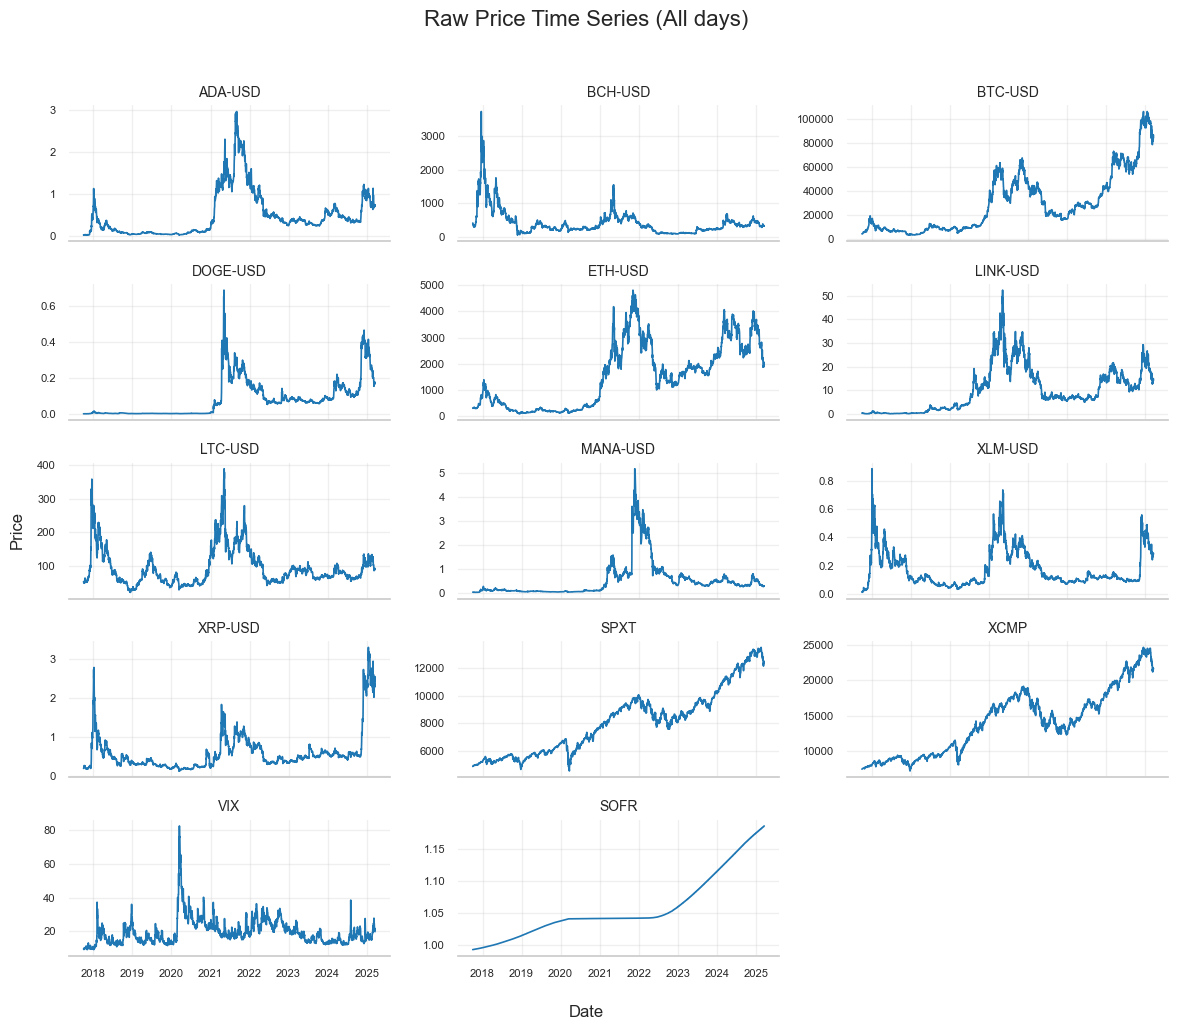

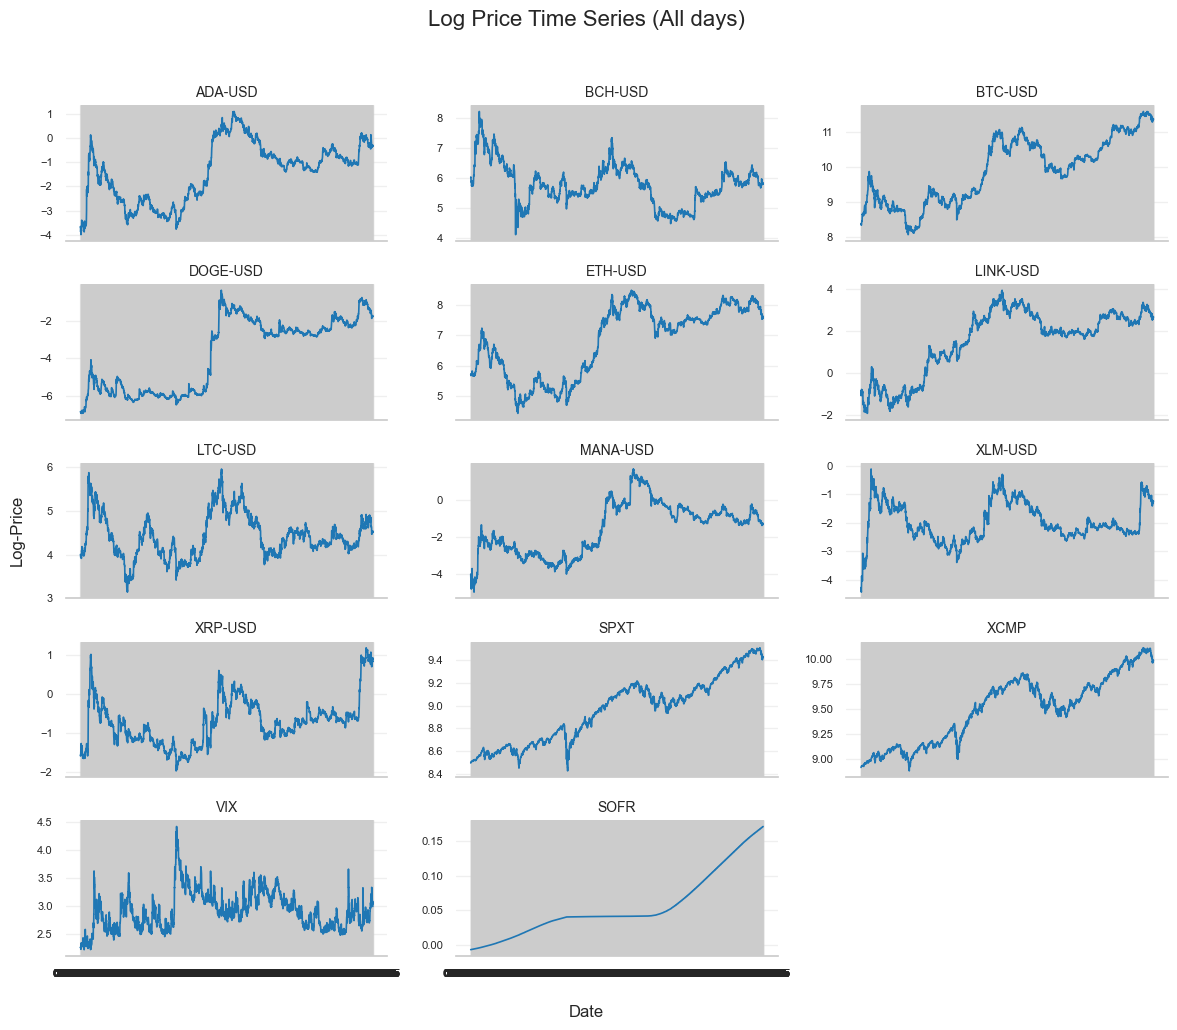

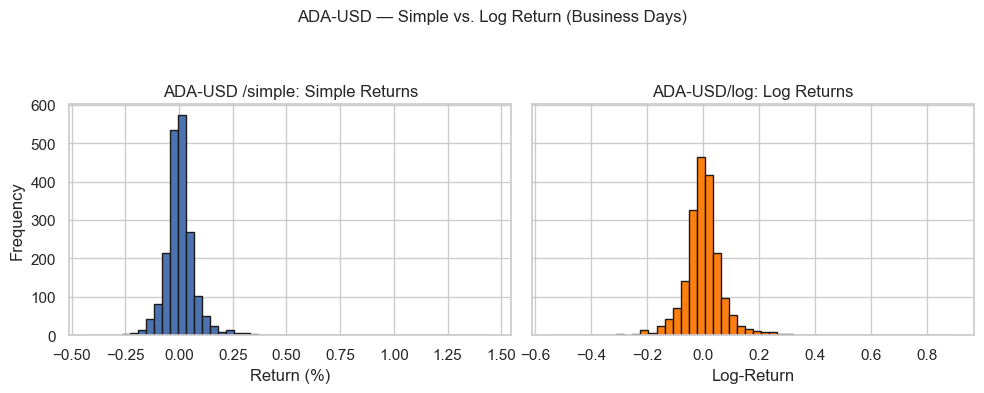

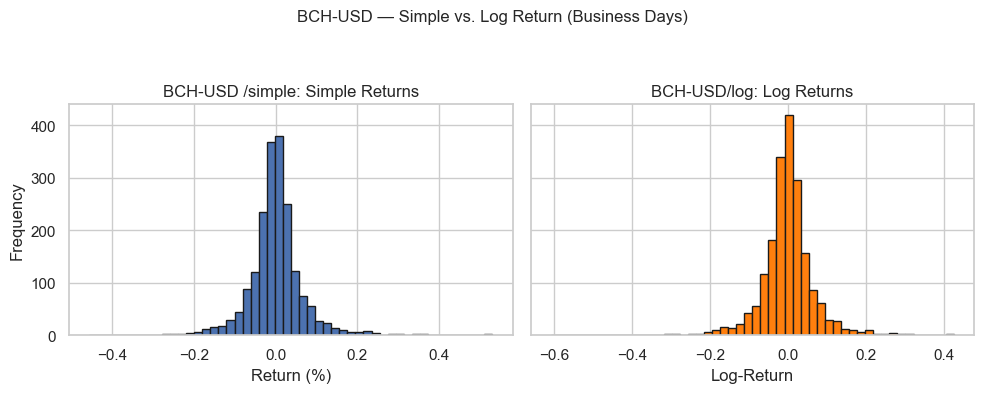

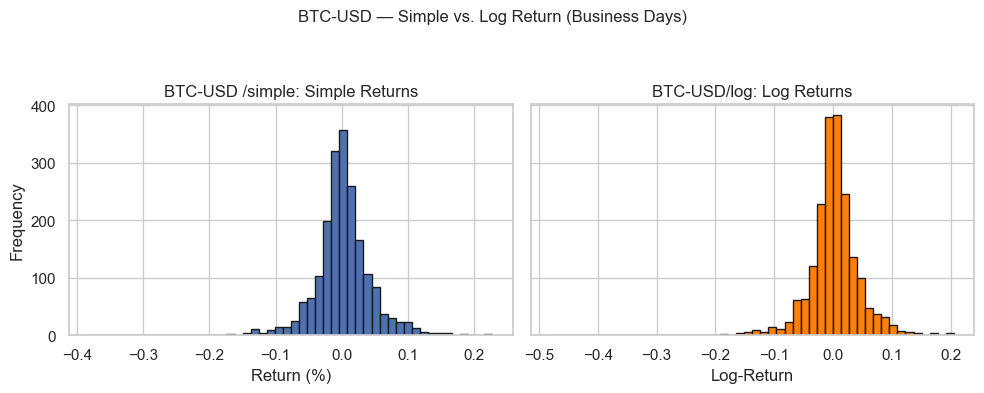

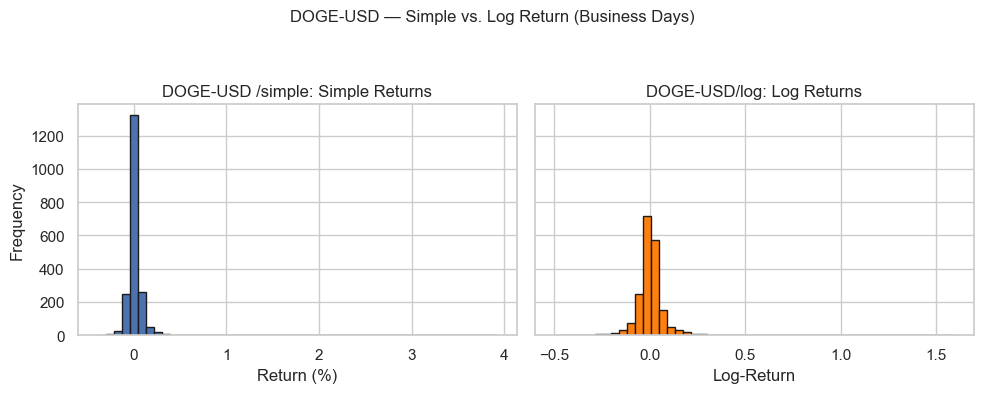

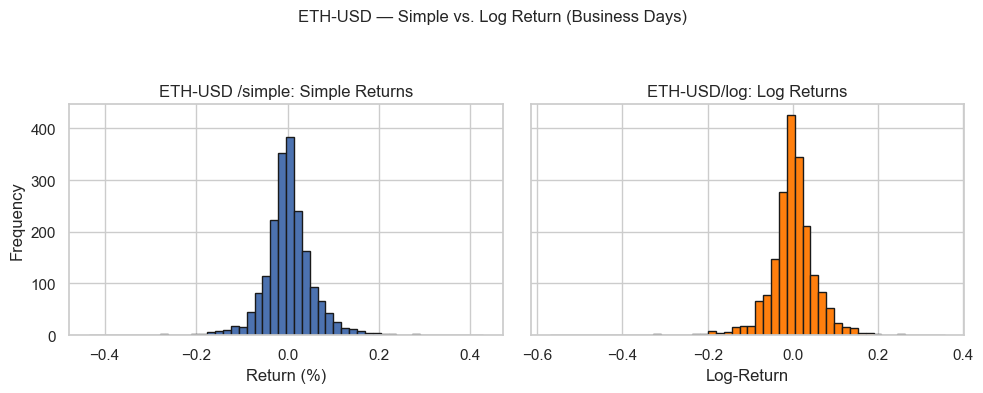

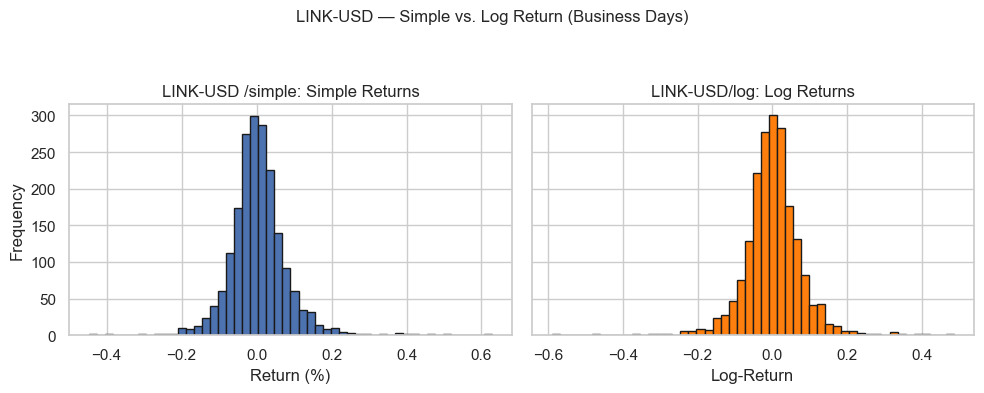

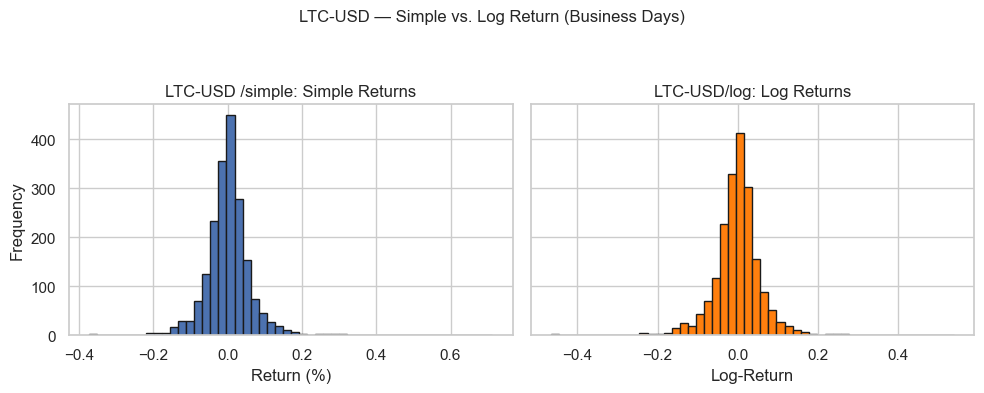

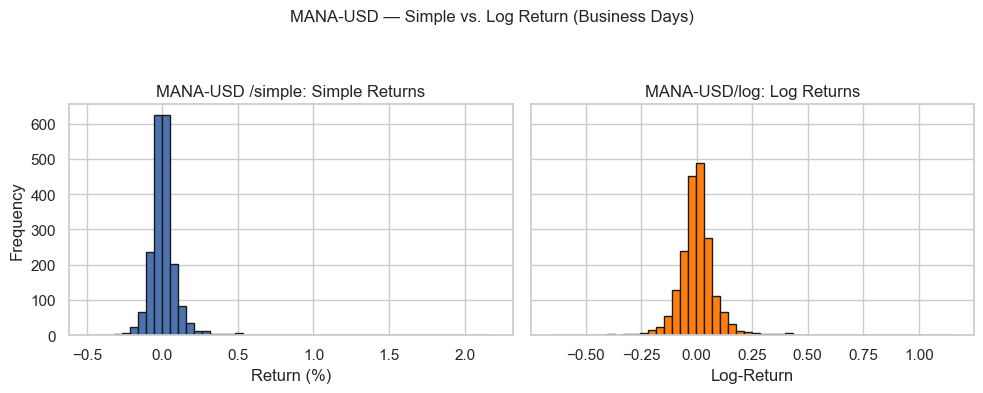

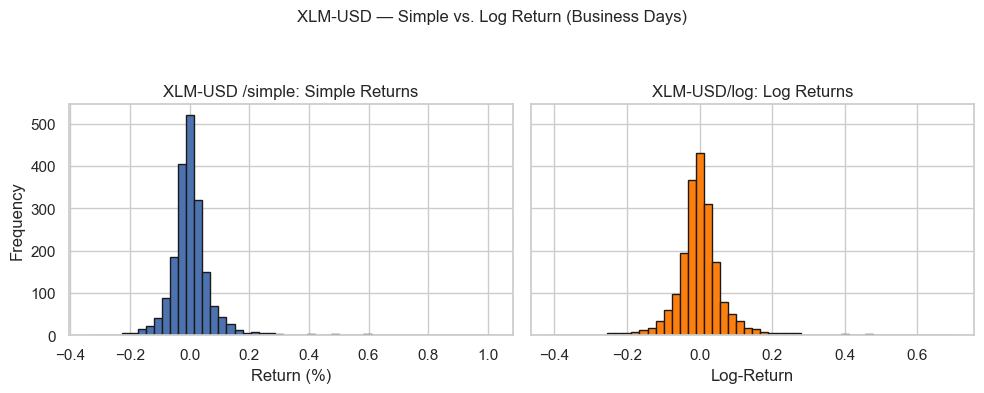

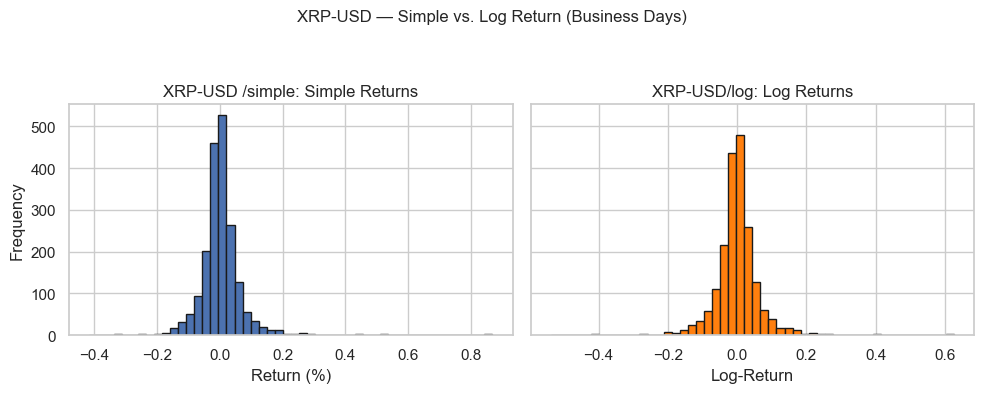

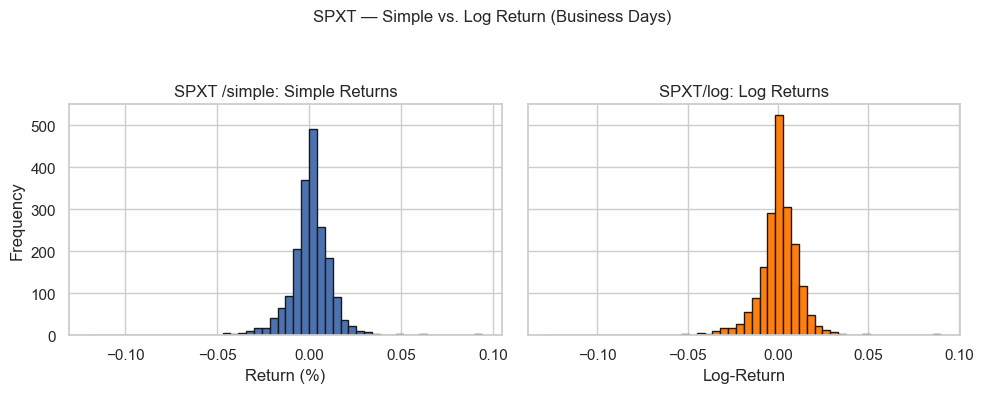

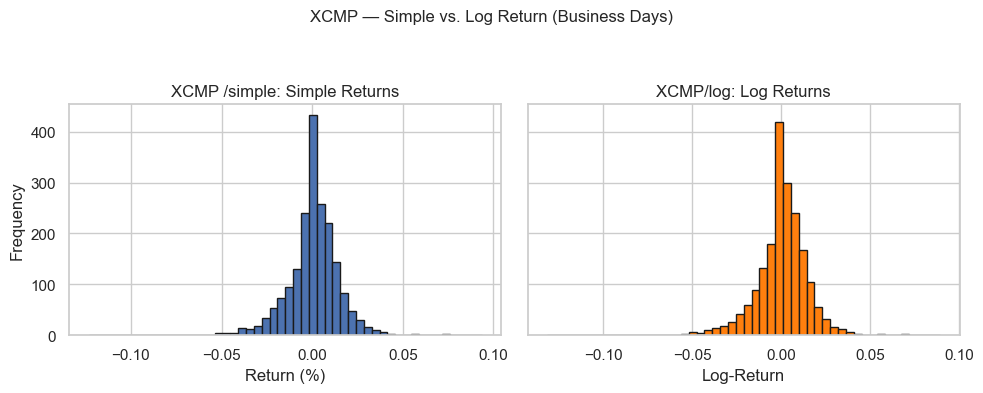

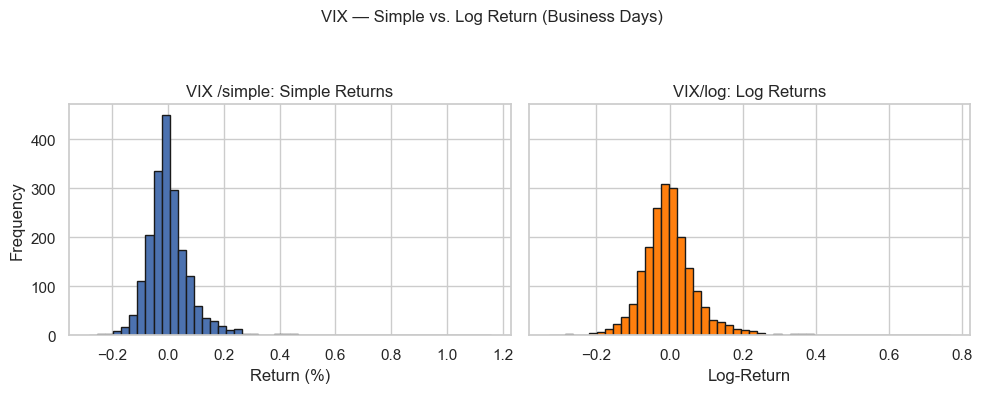

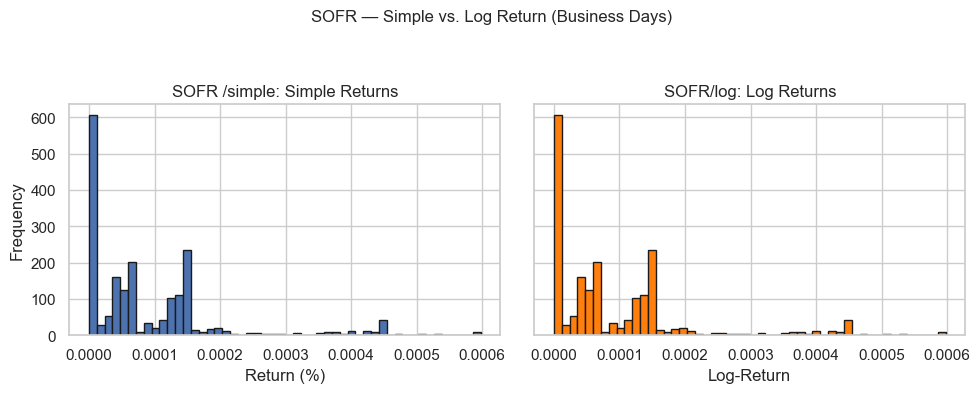

In [18]:
sns.set_theme(style="whitegrid") #set style

#  A) Raw Price Time Series (including weekend):

#Determine the layout
n = len(price_cols)
cols_per_row = 3
rows = (n + cols_per_row - 1) // cols_per_row
#Create the figure and axes
fig, axes = plt.subplots(rows, cols_per_row, 
                         figsize=(12, rows * 2), 
                         sharex=True)
axes = axes.flatten()

#Loop over each asset 
for ax, col in zip(axes, price_cols):
    sns.lineplot(x=df.index, y=df[col], ax=ax, linewidth=1.2, color="tab:blue")
    ax.set_title(col, fontsize=10)
    ax.set_xlabel(""); ax.set_ylabel("")
    ax.tick_params(left=False, bottom=False, labelsize=8)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_color("#CCCCCC")
    ax.grid(alpha=0.3)

#Remoove empty subplot
for ax in axes[n:]:
   fig.delaxes(ax)

#Add general title
fig.suptitle("Raw Price Time Series (All days)" , 
             fontsize=16,  
             y=1.02)    

#Add shared label
fig.supxlabel("Date", fontsize=12)
fig.supylabel("Price", fontsize=12)
fig.tight_layout()
plt.show()


#  B) Log‐Price Time Series for Cryptos & Equities:
log_price_cols = [c for c in log_prices.columns if c.endswith('_logPrice')]

n = len(log_price_cols)
cols_per_row = 3
rows = (n + cols_per_row - 1) // cols_per_row

fig, axes = plt.subplots(rows, cols_per_row,
                         figsize=(12, rows * 2),
                         sharex=True)
axes = axes.flatten()

for ax, col in zip(axes, log_price_cols):
    sns.lineplot(x=log_prices.index,
                 y=log_prices[col],
                 ax=ax,
                 linewidth=1.2,
                 color="tab:blue")
    ax.set_title(col.replace('_logPrice',''), fontsize=10)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.tick_params(left=False, bottom=False, labelsize=8)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_color("#CCCCCC")
    ax.grid(alpha=0.3)


for ax in axes[n:]:
    fig.delaxes(ax)


fig.suptitle("Log Price Time Series (All days)" , 
             fontsize=16, 
             y=1.02) 

fig.supxlabel("Date", fontsize=12)
fig.supylabel("Log-Price", fontsize=12)
fig.tight_layout()
plt.show()


# --- E) Histograms of Simple and log Returns for Price Series (on buisness days)

simple_cols = [c for c in returns_bd.columns if c.endswith(' /simple')] #Identify the simple return collumn

for simple_col in simple_cols: #iterate over each simple return collumn and its corresponding log return
    log_col = simple_col.replace(' /simple', '/log')

    # 2 subplot side by side
    fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
    
    # A) Simple returns histogram
    axes[0].hist(returns_bd[simple_col], bins=50, edgecolor='k')
    axes[0].set_title(f"{simple_col}: Simple Returns")
    axes[0].set_xlabel("Return (%)")
    axes[0].set_ylabel("Frequency")
    
    # B) Log returns histogram
    axes[1].hist(returns_bd[log_col], bins=50, edgecolor='k', color='tab:orange')
    axes[1].set_title(f"{log_col}: Log Returns")
    axes[1].set_xlabel("Log-Return")
    axes[1].set_ylabel("")

    
    fig.suptitle(f"{simple_col[:-8]} — Simple vs. Log Return (Business Days)", fontsize=12) #overall figure title
    plt.tight_layout(rect=[0, 0, 1, 0.92])
    plt.show()


/
Linear Return or Log return:

Linear return aggregate accrosss assets, wich is usefull for example to compute a portfolio's one-period return as a weighted sum of constituent
returns.
Hence, Risk and portfolio managers use linear returns for risk-analysis, performance attribution and portfolio optimization

Log return aggregate accross time, the compounded return over K periods is the sum of the intermediate 1-period compounded returns.


In the simple-return domaine, extreme moves appear directly as massive outliers, biaising moment estimates and making the square-root rule inapplicable. 

But crypto marginal distributions tell us that crypto returns exhibit Exteme kurtosis, Significant skewness and volatility clustering.

Log returns are not automatically iid just by taking logs, we still need stationarity and independence to call them invariants wich is not the case given the Marginal distributionss of the crypto assets. 

The log transform compresses large positive jumps and yields a searies that is closer to stationarity even though tails remain fat.

Meucci tells us that we may have issues when doing optimization with log returns if those aren't invariants ( Ivariants : they behave indentically and idenpendently across time). 

So he suggests: 
1) Estimate our one-day invariants on log-returns 
2) Project to horizon k by summing log returns
3) Map back to simple returns
4) Compute horizon means and covariances to put in our mean-variance optimizer

In [19]:
#Compute summary stat on log return. 
log_cols = [
    'ADA-USD/log','BCH-USD/log','BTC-USD/log','DOGE-USD/log',
    'ETH-USD/log','LINK-USD/log','LTC-USD/log','MANA-USD/log',
    'XLM-USD/log','XRP-USD/log','SPXT/log','XCMP/log',
    'VIX/log','SOFR/log'
]

summary_stats = returns_bd[log_cols].agg(['mean', 'std', 'skew', 'kurtosis']).T

print(summary_stats)


                  mean       std      skew   kurtosis
ADA-USD/log   0.001705  0.075637  2.138372  25.123757
BCH-USD/log  -0.000118  0.071049  0.040709   9.246112
BTC-USD/log   0.001515  0.043422 -0.817376  10.905432
DOGE-USD/log  0.002609  0.082284  4.661481  81.051812
ETH-USD/log   0.000975  0.055481 -0.649550   9.651523
LINK-USD/log  0.001891  0.075208  0.013394   6.459691
LTC-USD/log   0.000287  0.059894  0.094316  10.076927
MANA-USD/log  0.001499  0.089623  1.676269  22.535994
XLM-USD/log   0.001578  0.071085  1.624939  14.436242
XRP-USD/log   0.001275  0.068511  1.247989  16.950890
SPXT/log      0.000479  0.011993 -0.828098  15.488848
XCMP/log      0.000546  0.014470 -0.630714   7.473330
VIX/log       0.000380  0.078721  1.550248   9.577290
SOFR/log      0.000091  0.000110  2.070460   4.769815


We can see:

There are different vollatility order of magnitude, the ten crypto show daily volatility really higher comparatively to the traditional assets. 
Withing crypto, there are different level of magnitude  with DOGE, MANA and LINK on top of the spectrum and BTC, ETH and LTC on the bottom. 

Every crypto shows huge kurtosis, highlighting extreme tail-risk in crypto. 

Coins as ADA, BCH, DOGE, MANA, XLM, XRP have large positive skew, reflecting big up days. BTC and ETH are actually negatively skewed, indicating more frequent (or with higher magnitude) large down-moves than up-moves. 

SPXT/XCMP shows large kurtosis and negative skew shock log-return. Those are also fat-tailed but less extreme than crypto.

Vix log-returns exhibit high average day to day volatility. Fat tails with right skewed distribution indicating very large positive jumps in VIX.

Given that the overnight rate hardly moves day-to-day, those log-returns are almost always close to zero, with few policy moves.

CAVEAT: These numbers are on the raw series without oultiers treatment. So extreme value can can highly distort either mean, std, skewness and kurtosis. Moreover those statistics are computed on all the time series (without the weekends) wich can contain several different trends. 

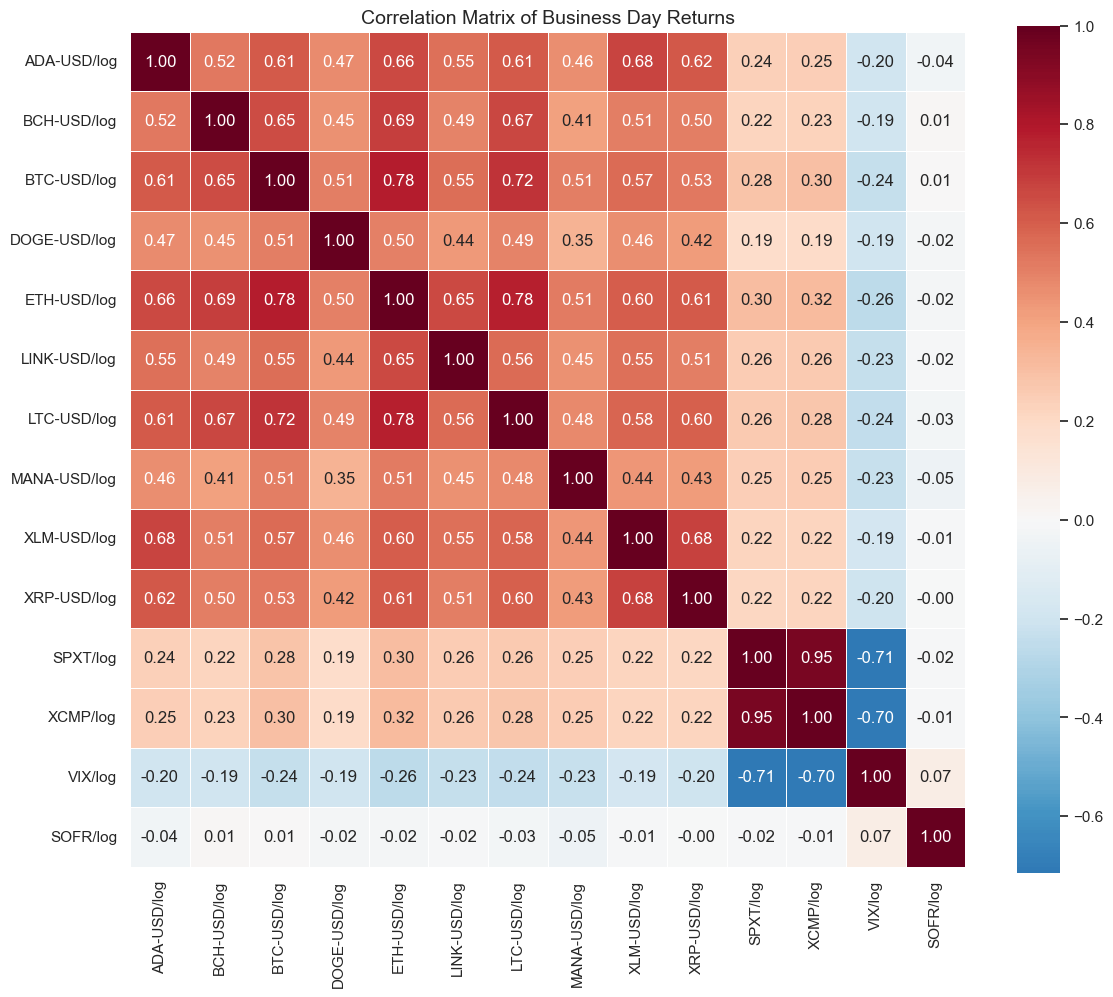

In [20]:
#Define the collumn we are interested in to compute the correlation matrix
log_cols = log_cols = [c for c in returns_bd.columns if c.endswith('/log')]


#Compute the correlation matrix
corr_matrix = returns_bd[log_cols].corr()


plt.figure(figsize=(12,10))
sns.heatmap(
    corr_matrix,
    annot=True,        # write the correlation number in each cell
    fmt=".2f",         # two decimal places
    cmap="RdBu_r",     # red–blue diverging colormap
    center=0,          # white at zero
    square=True,       # square cells
    linewidths=0.5
)
plt.title("Correlation Matrix of Business Day Returns", fontsize=14)
plt.tight_layout()
plt.show()

We can see:

Really high correlation among cryptocurrencies. Suggesting they often moove together in response to market dynamics.
Crypto and equities show modest positive correlation. 
SPXT and XCMP show a correlation that's close to 1. Wich make sens given that they represent broad U.S. equity indices.
They are almost interchangeable (in correlation context) and both shows a high negative correlation vix the VIX.

The VIX is a real-time market index that measures the expected volatility of the S&P 500 over the next 30 days, based on options prices. When the market panics (S&P 500 down), fear spikes (VIX up). When the market rallies, calm returns (VIX down).

Even though the VIX is calculated from S&P 500 options, it’s used as a proxy for market-wide fear, including NASDAQ. Wich explain the strong negative correlation between the vix index and the nasdaw index too. 

SOFR appears essentially uncorrelated with other assets. Unlike equities or cryptocurrencies, it doesn’t respond meaningfully to daily investor sentiment or market volatility.

As for the summary statistics we need to keep in mind that this is on the entire time series (whitout the weekends) and that the outliers are not treated.

Let's now treat the outliers and repeat this analysis to see if there are any interesting changes.


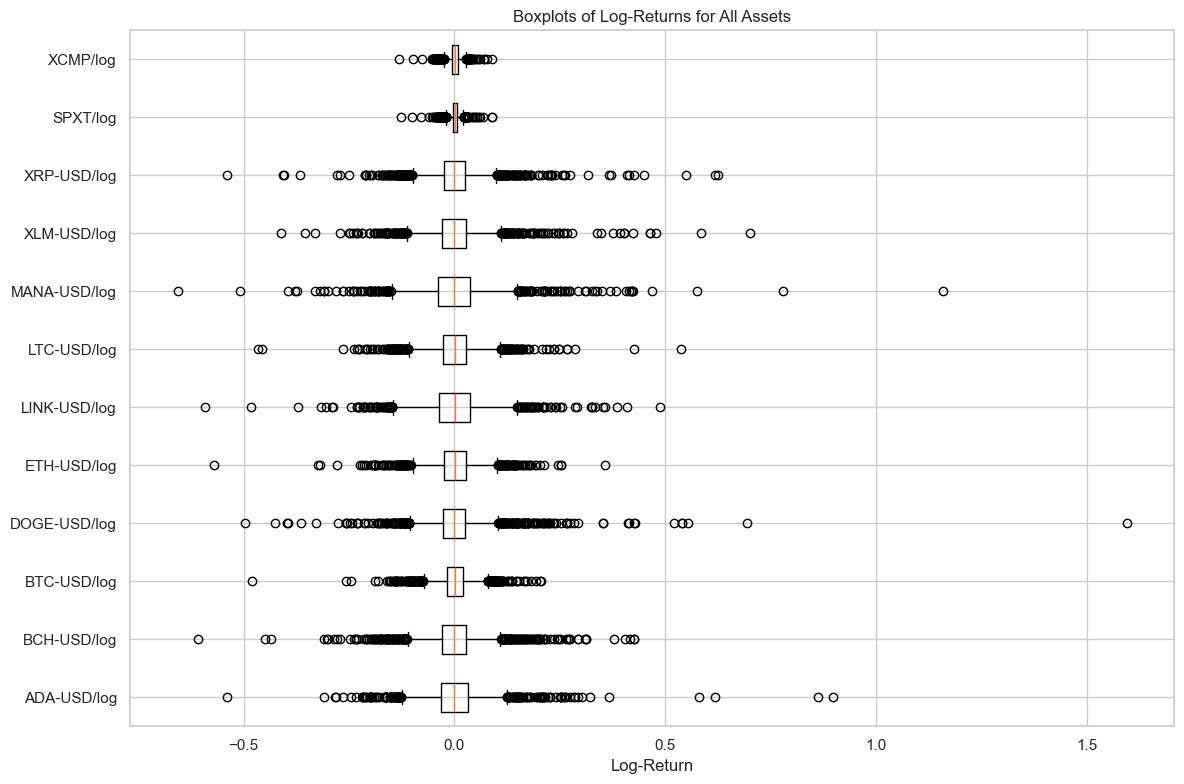

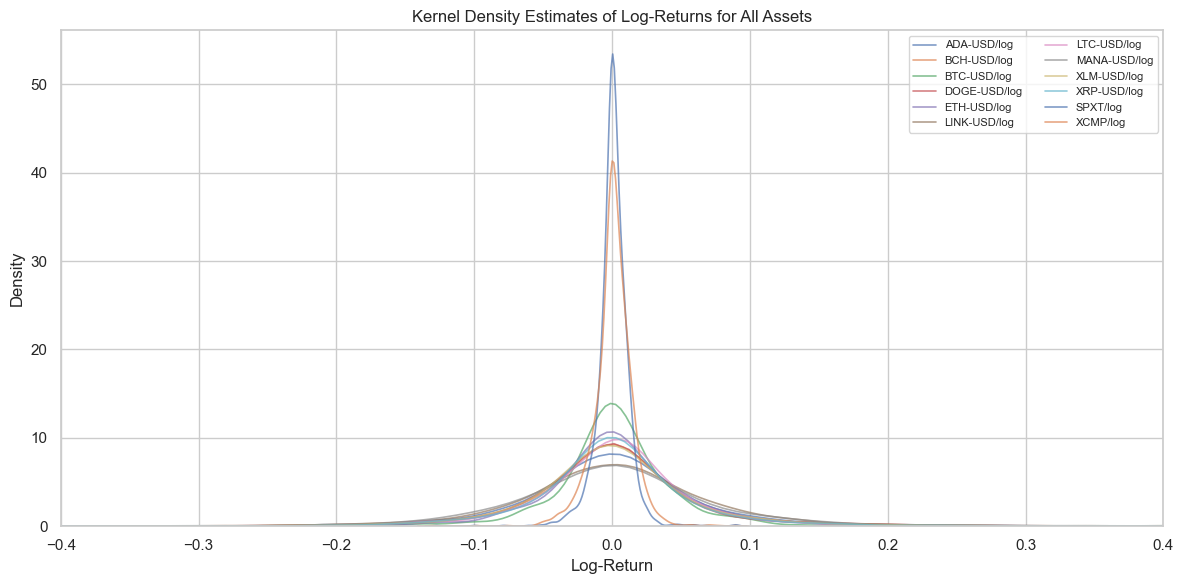

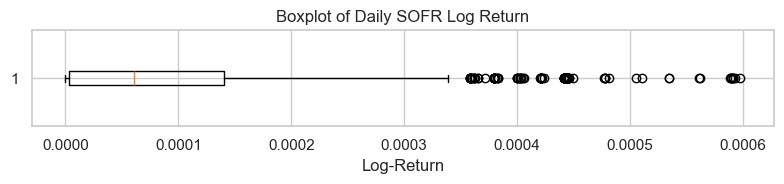

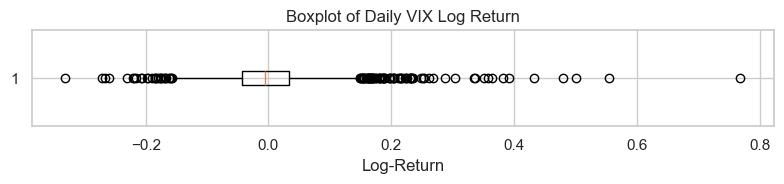

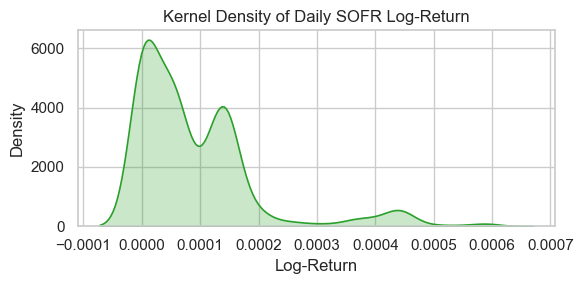

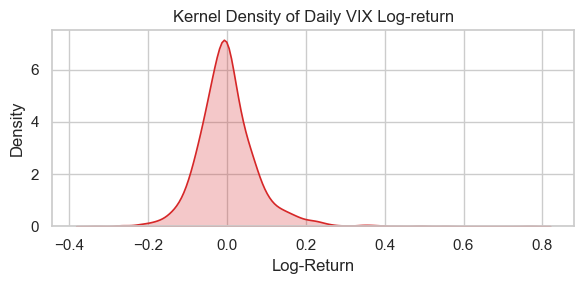

In [21]:
#NOW LET'S FOCUS ON OUTLIERS:

#We will plot separately the (crypto + Equities indices), (the VIX) and (the SOFR). Given difference in scale of VIX and SOFR with respect to Crypto
#and equities it will help us visualize the plots.
cols_for_boxplot = ['ADA-USD/log','BCH-USD/log','BTC-USD/log','DOGE-USD/log',
    'ETH-USD/log','LINK-USD/log','LTC-USD/log','MANA-USD/log',
    'XLM-USD/log','XRP-USD/log','SPXT/log','XCMP/log'] 


# 1. Compute Q1, Q3, and IQR on just the log‑return subset
Q1  = returns_bd[cols_for_boxplot].quantile(0.25)
Q3  = returns_bd[cols_for_boxplot].quantile(0.75)
IQR = Q3 - Q1

# 2. Define boxplot fences
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# 3. Build a row mask: True if any log‑return in that row is an outlier
mask = (returns_bd[cols_for_boxplot] < lower) | (returns_bd[cols_for_boxplot] > upper)

# 4. Extract only the rows (dates) where any log‑return is outside its fences
outliers = returns_bd.loc[mask.any(axis=1), cols_for_boxplot]

# Prepare data for boxplot
data = [returns_bd[col].values for col in cols_for_boxplot]

# Create horizontal boxplot
plt.figure(figsize=(12, 8))
plt.boxplot(data, vert=False)
plt.yticks(range(1, len(cols_for_boxplot) + 1), cols_for_boxplot)
plt.title("Boxplots of Log-Returns for All Assets")
plt.xlabel("Log-Return")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
for col in cols_for_boxplot:
    sns.kdeplot(returns_bd[col], label=col, linewidth=1.2, fill=False, alpha=0.7)
plt.title("Kernel Density Estimates of Log-Returns for All Assets")
plt.xlabel("Log-Return")
plt.xlim(-0.4, 0.4)
plt.ylabel("Density")
plt.legend(fontsize=8, ncol=2)
plt.tight_layout()
plt.show()



# 1. Compute Q1, Q3, IQR for SOFR log return
Q1_sofr   = returns_bd['SOFR/log'].quantile(0.25)
Q3_sofr   = returns_bd['SOFR/log'].quantile(0.75)
IQR_sofr  = Q3_sofr - Q1_sofr

# 2. Define fences at 1.5×IQR
lower_sofr = Q1_sofr - 1.5 * IQR_sofr
upper_sofr = Q3_sofr + 1.5 * IQR_sofr

# 3. Build mask for SOFR outliers
mask_sofr = (returns_bd['SOFR/log'] < lower_sofr) | (returns_bd['SOFR/log'] > upper_sofr)


# 1. Compute Q1, Q3, IQR for VIX
Q1_vix   = returns_bd['VIX/log'].quantile(0.25)
Q3_vix   = returns_bd['VIX/log'].quantile(0.75)
IQR_vix  = Q3_vix - Q1_vix

# 2. Define fences at 1.5×IQR
lower_vix = Q1_vix - 1.5 * IQR_vix
upper_vix = Q3_vix + 1.5 * IQR_vix

# 3. Build mask for VIX outliers
mask_vix = (returns_bd['VIX/log'] < lower_vix) | (returns_bd['VIX/log'] > upper_vix)


sofr = returns_bd['SOFR/log']
plt.figure(figsize=(8, 2))
plt.boxplot(sofr, vert=False, whis=1.5)       # whiskers at 1.5×IQR

plt.title('Boxplot of Daily SOFR Log Return')
plt.xlabel("Log-Return")
plt.tight_layout()
plt.show()

# — Plot VIX —
vix = returns_bd['VIX/log']
plt.figure(figsize=(8, 2))
plt.boxplot(vix, vert=False, whis=1.5)      # whiskers at 1.5×IQR

plt.title('Boxplot of Daily VIX Log Return')
plt.xlabel('Log-Return')
plt.tight_layout()
plt.show()


# KDE for SOFR
plt.figure(figsize=(6, 3))
sns.kdeplot(returns_bd['SOFR/log'], fill=True, linewidth=1.2, color='tab:green')
plt.title("Kernel Density of Daily SOFR Log-Return")
plt.xlabel('Log-Return')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

# KDE for VIX
plt.figure(figsize=(6, 3))
sns.kdeplot(returns_bd['VIX/log'], fill=True, linewidth=1.2, color='tab:red')
plt.title("Kernel Density of Daily VIX Log-return")
plt.xlabel('Log-Return')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

Cryptos exhibit dramatically fatter tails than equities.
We can see also that the IQR box is way bigger for crypto than for equities wich can be seen too on the KDE with equities that are more peaked around zero with respect to Crypto. 

There are a lot of extreme outliers, These extreme tails will dominate our raw moments. 
We need to treat those oultiers by winsorization to have robust result that will not be highly impacted by some extreme market events.

The KDE highlights the longest tails for Crypto w.r.t. equities.

SOFR is almost always close to zero except when there is a policy changes. (rightly skewed)

For the VIX we can see that there are extreme value on both sides but especially on the positive side, wich can also be seen in the KDE ( Positively skewed)

In [22]:
# 1) Count outliers in each crypto/equity log-return column
outliers_per_asset = mask.sum()       # Series indexed by asset name

# 2) Count outliers in SOFR and VIX
extra = pd.Series({
    'SOFR/log': mask_sofr.sum(),
    'VIX/log' : mask_vix.sum()
})

# 3) Concatenate into one Series
all_outliers = pd.concat([outliers_per_asset, extra])

# 4) Turn into a DataFrame
outlier_df = (
    all_outliers
      .rename('Outliers Count')        # name the count column
      .reset_index()                  # bring the index into a column
      .rename(columns={'index':'Assets'})  # rename for clarity
)

print(outlier_df)


          Assets  Outliers Count
0    ADA-USD/log             142
1    BCH-USD/log             175
2    BTC-USD/log             149
3   DOGE-USD/log             186
4    ETH-USD/log             125
5   LINK-USD/log             102
6    LTC-USD/log             135
7   MANA-USD/log             125
8    XLM-USD/log             152
9    XRP-USD/log             179
10      SPXT/log             127
11      XCMP/log             125
12      SOFR/log             119
13       VIX/log             104


In [23]:
#TREATING THE OUTLIERS:

#We treat all indices as regular, tradable assets when constructing our portfolio (i.e. we’re not especially trying to preserve SOFR’s macro‑economic “policy shift” signal).
#We then winsorize returns at 1 % on each tail, (as seen in the course) on each side for crypto, equities, and the VIX. Because SOFR log‑returns are almost always near zero, 
#we apply a much lighter trim, 0.5 % on each tail, to avoid discarding genuine, small rate movements.

#1) Crypto / Equities / VIX: 

log_cols = ['ADA-USD/log','BCH-USD/log','BTC-USD/log','DOGE-USD/log',
    'ETH-USD/log','LINK-USD/log','LTC-USD/log','MANA-USD/log',
    'XLM-USD/log','XRP-USD/log','SPXT/log', 'XCMP/log',"VIX/log"]

# compute 1st and 99th percentiles separately
lo_c = returns_bd[log_cols].quantile(0.01)
hi_c = returns_bd[log_cols].quantile(0.99)
# cap the outer 1% on each tail
returns_2wins = returns_bd[log_cols].clip(lower=lo_c, upper=hi_c, axis=1)

#-----------------------------------------------------------------------------------------------------------------

# SOFR: 

lo_sofr = returns['SOFR/log'].quantile(0.005)
hi_sofr = returns["SOFR/log"].quantile(0.995)
returns_SOFR_wins = returns_bd['SOFR/log'].clip(lower=lo_sofr,upper=hi_sofr)

#----------------------------------------------------------------

#AGREGATE THE NEW WINSORIZED DATA:

# 1. Combine winsorized log-returns
returns_wins = pd.concat([returns_2wins,
                          returns_SOFR_wins,
                         ], axis=1)

returns_wins.head()

,ADA-USD/log,BCH-USD/log,BTC-USD/log,DOGE-USD/log,ETH-USD/log,LINK-USD/log,LTC-USD/log,MANA-USD/log,XLM-USD/log,XRP-USD/log,SPXT/log,XCMP/log,VIX/log,SOFR/log
Date,,,,,,,,,,,,,,
2017-10-03,-0.193752,-0.042999,-0.019997,-0.027003,-0.016989,-0.033863,-0.021625,0.153953,-0.046447,0.000984,0.002201,0.002376,0.006329,0.000032
2017-10-04,0.049156,-0.122394,-0.022390,-0.008837,-0.000446,0.126269,-0.017994,-0.156027,-0.049556,0.048954,0.001313,0.000599,0.012539,0.000032
2017-10-05,-0.017047,-0.004168,0.024071,-0.006927,0.011284,0.032625,0.008166,-0.065785,0.204512,0.108634,0.005803,0.007746,-0.046767,0.000032
2017-10-06,-0.151753,0.025053,0.011618,0.016741,0.044229,0.144581,0.008484,-0.216348,0.235686,-0.019517,-0.000759,0.000747,0.048842,0.000032
2017-10-09,0.176989,-0.149099,0.088708,-0.048009,-0.037607,-0.199759,-0.039159,0.272991,-0.041094,0.069107,-0.001806,-0.001587,0.068094,0.000095


In [24]:
#NOW WE DO POST CLEANING EDA:

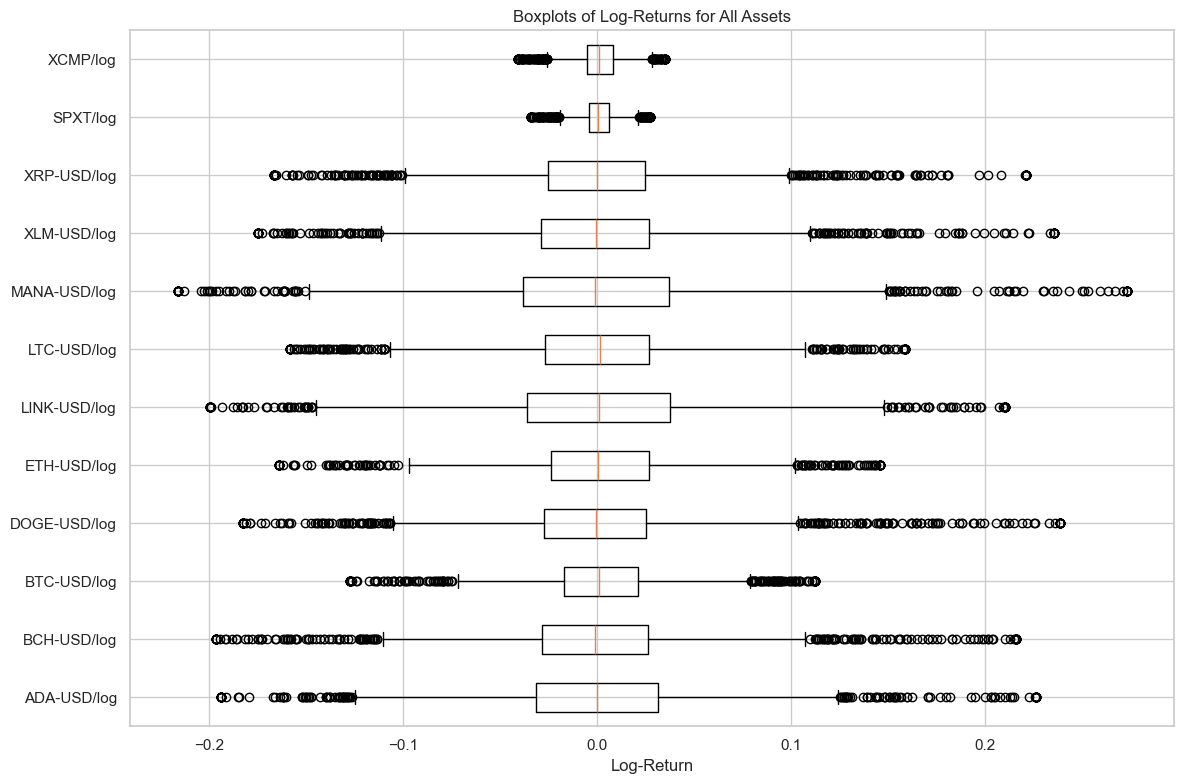

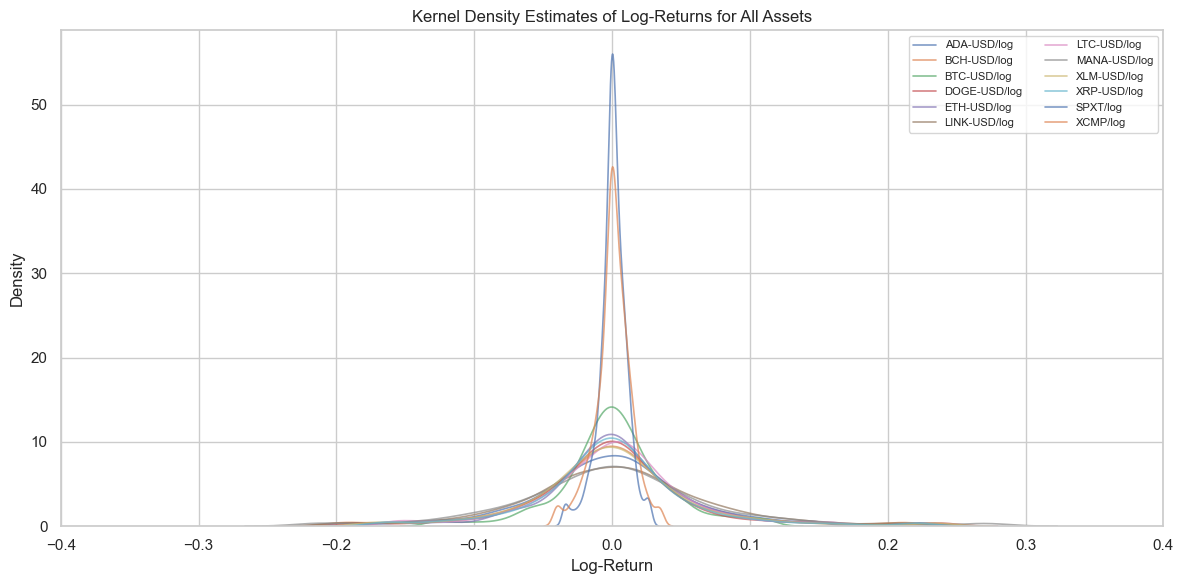

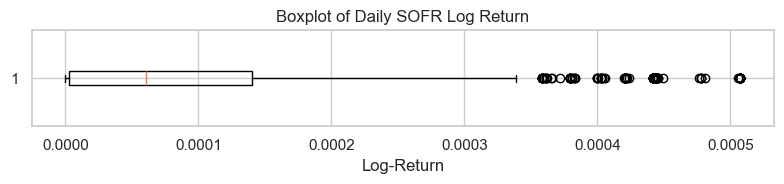

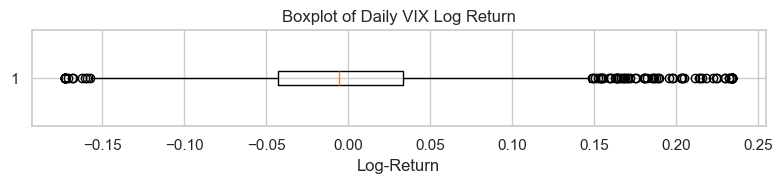

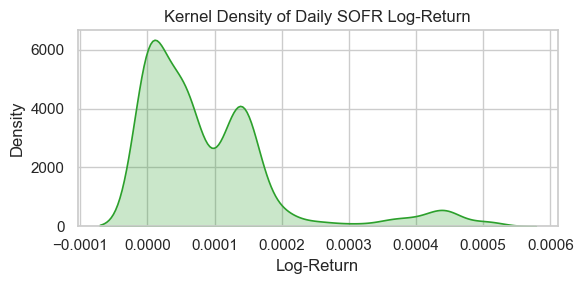

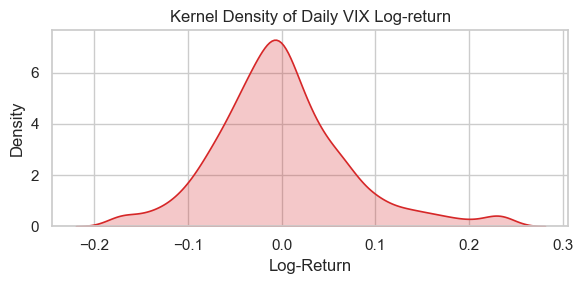

In [25]:
cols_for_boxplot = ['ADA-USD/log','BCH-USD/log','BTC-USD/log','DOGE-USD/log',
    'ETH-USD/log','LINK-USD/log','LTC-USD/log','MANA-USD/log',
    'XLM-USD/log','XRP-USD/log','SPXT/log','XCMP/log'] 


# 1. Compute Q1, Q3, and IQR on just the log‑return subset
Q1  = returns_wins[cols_for_boxplot].quantile(0.25)
Q3  = returns_wins[cols_for_boxplot].quantile(0.75)
IQR = Q3 - Q1

# 2. Define boxplot fences
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# 3. Build a row mask: True if any log‑return in that row is an outlier
mask = (returns_wins[cols_for_boxplot] < lower) | (returns_wins[cols_for_boxplot] > upper)

# 4. Extract only the rows (dates) where any log‑return is outside its fences
outliers = returns_wins.loc[mask.any(axis=1), cols_for_boxplot]

# Prepare data for boxplot
data = [returns_wins[col].values for col in cols_for_boxplot]

# Create horizontal boxplot
plt.figure(figsize=(12, 8))
plt.boxplot(data, vert=False)
plt.yticks(range(1, len(cols_for_boxplot) + 1), cols_for_boxplot)
plt.title("Boxplots of Log-Returns for All Assets")
plt.xlabel("Log-Return")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
for col in cols_for_boxplot:
    sns.kdeplot(returns_wins[col], label=col, linewidth=1.2, fill=False, alpha=0.7)
plt.title("Kernel Density Estimates of Log-Returns for All Assets")
plt.xlabel("Log-Return")
plt.xlim(-0.4, 0.4)
plt.ylabel("Density")
plt.legend(fontsize=8, ncol=2)
plt.tight_layout()
plt.show()



# 1. Compute Q1, Q3, IQR for SOFR log return
Q1_sofr   = returns_wins['SOFR/log'].quantile(0.25)
Q3_sofr   = returns_wins['SOFR/log'].quantile(0.75)
IQR_sofr  = Q3_sofr - Q1_sofr

# 2. Define fences at 1.5×IQR
lower_sofr = Q1_sofr - 1.5 * IQR_sofr
upper_sofr = Q3_sofr + 1.5 * IQR_sofr

# 3. Build mask for SOFR_diff outliers
mask_sofr = (returns_wins['SOFR/log'] < lower_sofr) | (returns_wins['SOFR/log'] > upper_sofr)


# 1. Compute Q1, Q3, IQR for VIX
Q1_vix   = returns_wins['VIX/log'].quantile(0.25)
Q3_vix   = returns_wins['VIX/log'].quantile(0.75)
IQR_vix  = Q3_vix - Q1_vix

# 2. Define fences at 1.5×IQR
lower_vix = Q1_vix - 1.5 * IQR_vix
upper_vix = Q3_vix + 1.5 * IQR_vix

# 3. Build mask for VIX outliers
mask_vix = (returns_wins['VIX/log'] < lower_vix) | (returns_wins['VIX/log'] > upper_vix)


sofr = returns_wins['SOFR/log']
plt.figure(figsize=(8, 2))
plt.boxplot(sofr, vert=False, whis=1.5)       # whiskers at 1.5×IQR

plt.title('Boxplot of Daily SOFR Log Return')
plt.xlabel("Log-Return")
plt.tight_layout()
plt.show()

# — Plot VIX_diff —
vix = returns_wins['VIX/log']
plt.figure(figsize=(8, 2))
plt.boxplot(vix, vert=False, whis=1.5)      # whiskers at 1.5×IQR

plt.title('Boxplot of Daily VIX Log Return')
plt.xlabel('Log-Return')
plt.tight_layout()
plt.show()


# KDE for SOFR
plt.figure(figsize=(6, 3))
sns.kdeplot(returns_wins['SOFR/log'], fill=True, linewidth=1.2, color='tab:green')
plt.title("Kernel Density of Daily SOFR Log-Return")
plt.xlabel('Log-Return')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

# KDE for VIX
plt.figure(figsize=(6, 3))
sns.kdeplot(returns_wins['VIX/log'], fill=True, linewidth=1.2, color='tab:red')
plt.title("Kernel Density of Daily VIX Log-return")
plt.xlabel('Log-Return')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

After applying 1% winsorization to the log-returns, the most extreme values on both tails have been capped. This visibly reduces the influence of outliers, especially in high-volatility crypto assets such as DOGE, XRP, and BCH. The resulting distributions appear more symmetric and compact, particularly in the interquartile range, improving the robustness of moment estimates.

For SOFR and VIX, the effect of winsorization is more subtle. SOFR returns remain tightly clustered around zero, and the light 0.5% trimming applied was sufficient to remove only a few marginal observations without distorting the core distribution. In contrast, VIX shows a noticeable reduction in extreme values while preserving its natural asymmetry.


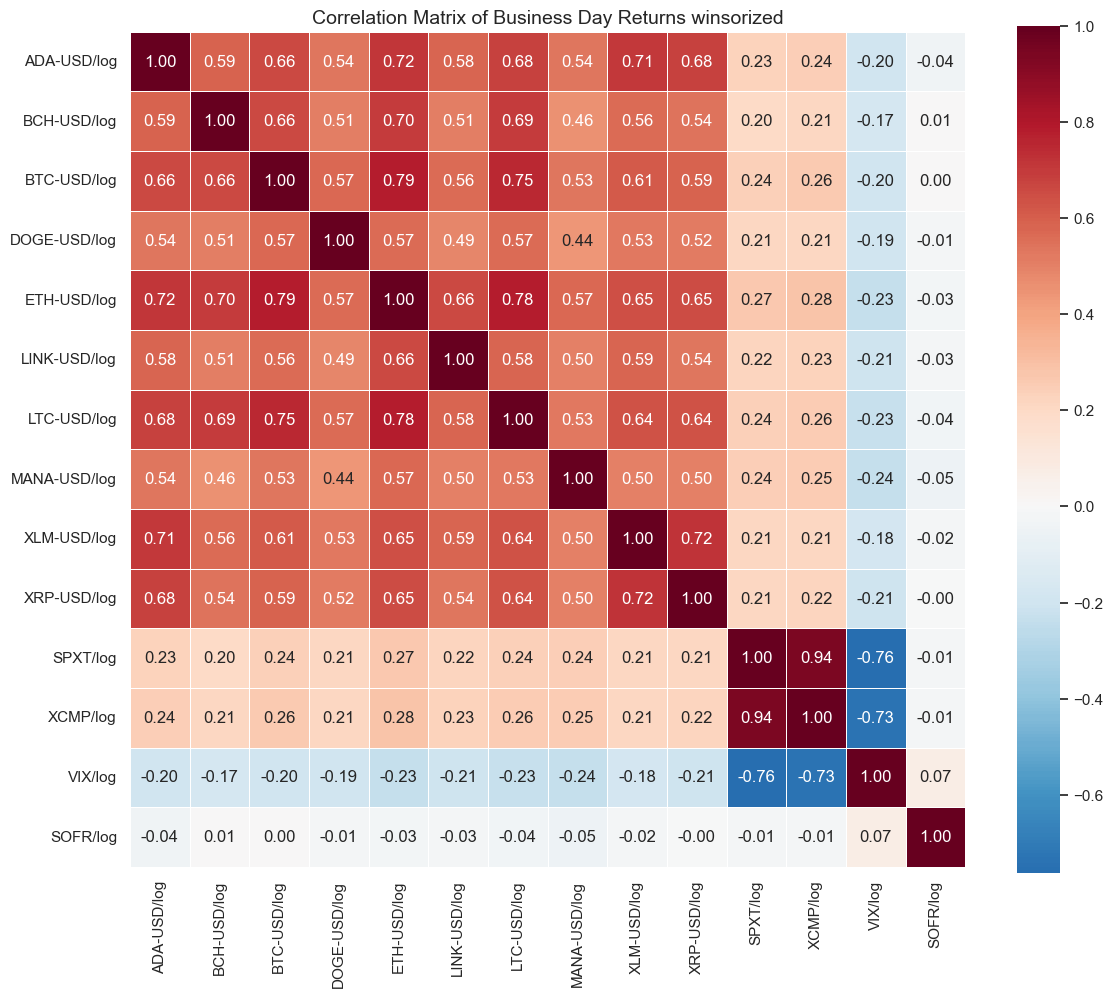

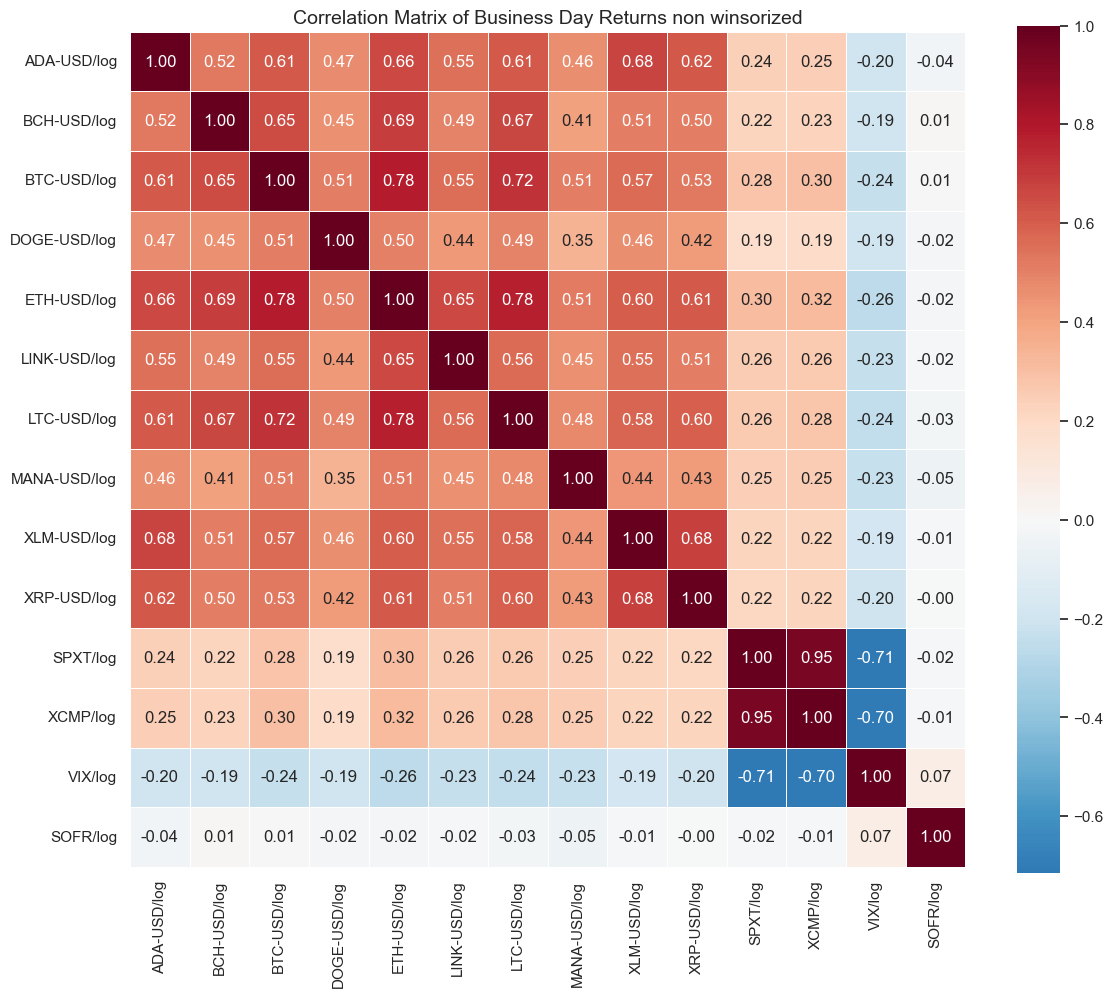

In [26]:
#Compute the correlation matrix

log_cols = [ 'ADA-USD/log','BCH-USD/log','BTC-USD/log','DOGE-USD/log',
    'ETH-USD/log','LINK-USD/log','LTC-USD/log','MANA-USD/log',
    'XLM-USD/log','XRP-USD/log','SPXT/log','XCMP/log',
    'VIX/log','SOFR/log']

corr_matrix_wins = returns_wins[log_cols].corr()


plt.figure(figsize=(12,10))
sns.heatmap(
    corr_matrix_wins,
    annot=True,        # write the correlation number in each cell
    fmt=".2f",         # two decimal places
    cmap="RdBu_r",     # red–blue diverging colormap
    center=0,          # white at zero
    square=True,       # square cells
    linewidths=0.5
)
plt.title("Correlation Matrix of Business Day Returns winsorized", fontsize=14)
plt.tight_layout()
plt.show()


plt.figure(figsize=(12,10))
sns.heatmap(
    corr_matrix,
    annot=True,        # write the correlation number in each cell
    fmt=".2f",         # two decimal places
    cmap="RdBu_r",     # red–blue diverging colormap
    center=0,          # white at zero
    square=True,       # square cells
    linewidths=0.5
)
plt.title("Correlation Matrix of Business Day Returns non winsorized", fontsize=14)
plt.tight_layout()
plt.show()

winsorization tames the role of a few extreme days, which nudges some pairwise correlations up or down by a few points , but the overall correlation structure (very high within equities, high within cryptos, moderate across crypto / equities, and negative betweeen equities and vix) remains intact.

In [27]:
#Compute summary stat on log return winsorized. 

summary_stats_wins = returns_wins.agg(['mean', 'std', 'skew', 'kurtosis']).T

combined_stats = pd.concat( {"Log Return": summary_stats, "Log Return Winsorised": summary_stats_wins},axis = 1)

combined_stats

Log Return                                Log Return Winsorised  \
                   mean       std      skew   kurtosis                  mean   
ADA-USD/log    0.001705  0.075637  2.138372  25.123757              0.000754   
BCH-USD/log   -0.000118  0.071049  0.040709   9.246112             -0.000129   
BTC-USD/log    0.001515  0.043422 -0.817376  10.905432              0.001619   
DOGE-USD/log   0.002609  0.082284  4.661481  81.051812              0.001471   
ETH-USD/log    0.000975  0.055481 -0.649550   9.651523              0.001135   
LINK-USD/log   0.001891  0.075208  0.013394   6.459691              0.001765   
LTC-USD/log    0.000287  0.059894  0.094316  10.076927              0.000156   
MANA-USD/log   0.001499  0.089623  1.676269  22.535994              0.000822   
XLM-USD/log    0.001578  0.071085  1.624939  14.436242              0.000827   
XRP-USD/log    0.001275  0.068511  1.247989  16.950890              0.000822   
SPXT/log       0.000479  0.011993 -0.828098  15.488848              0.000461   
XCMP/log       0.000546  0.014470 -0.630714   7.473330              0.000544   
VIX/log        0.000380  0.078721  1.550248   9.577290             -0.000571   
SOFR/log       0.000091  0.000110  2.070460   4.769815              0.000091   

                                            
                   std      skew  kurtosis  
ADA-USD/log   0.064645  0.331076  2.175843  
BCH-USD/log   0.063278  0.197078  2.469498  
BTC-USD/log   0.039635 -0.137368  1.556347  
DOGE-USD/log  0.062278  0.655612  3.247427  
ETH-USD/log   0.050479 -0.130141  1.563508  
LINK-USD/log  0.068371  0.061370  1.140882  
LTC-USD/log   0.053331 -0.106731  1.390420  
MANA-USD/log  0.075871  0.418069  2.144416  
XLM-USD/log   0.061291  0.567050  2.863358  
XRP-USD/log   0.057632  0.482847  2.850345  
SPXT/log      0.010288 -0.537011  1.636453  
XCMP/log      0.013235 -0.427910  1.108111  
VIX/log       0.070890  0.657213  1.376315  
SOFR/log      0.000108  1.963681  4.049580

By cutting the most extreme values ( after choosing our levels of winsorization) we avoid having only a few extreme observation that will dominate our raw moments and do not discard genuine asset movements 

After winsorization we can see that our moments are now less impacted by some extreme value that dominated the raw moments.

Volatility dropped significantly. For each asset skewness is now closer to 0 and The kurtosis is now closer to a more "Gaussian-like" distribution. 

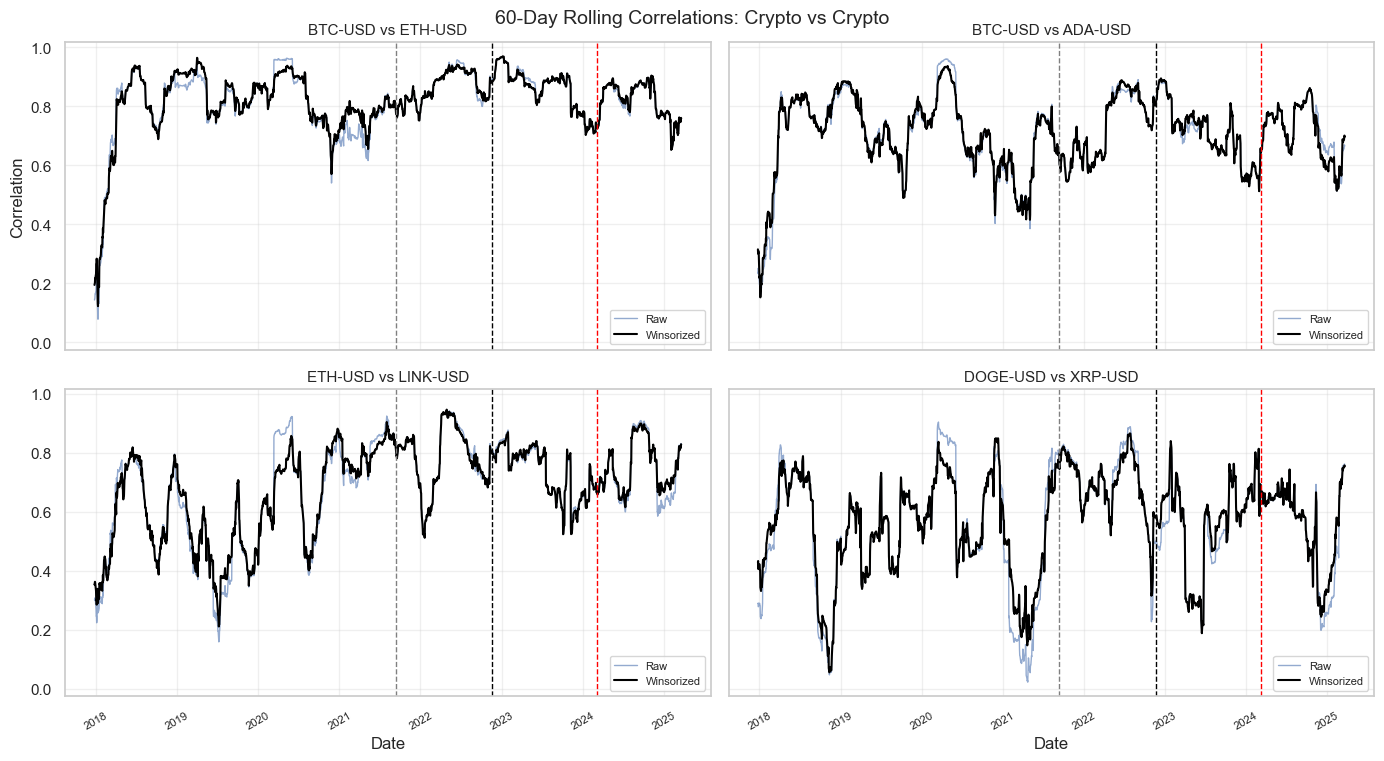

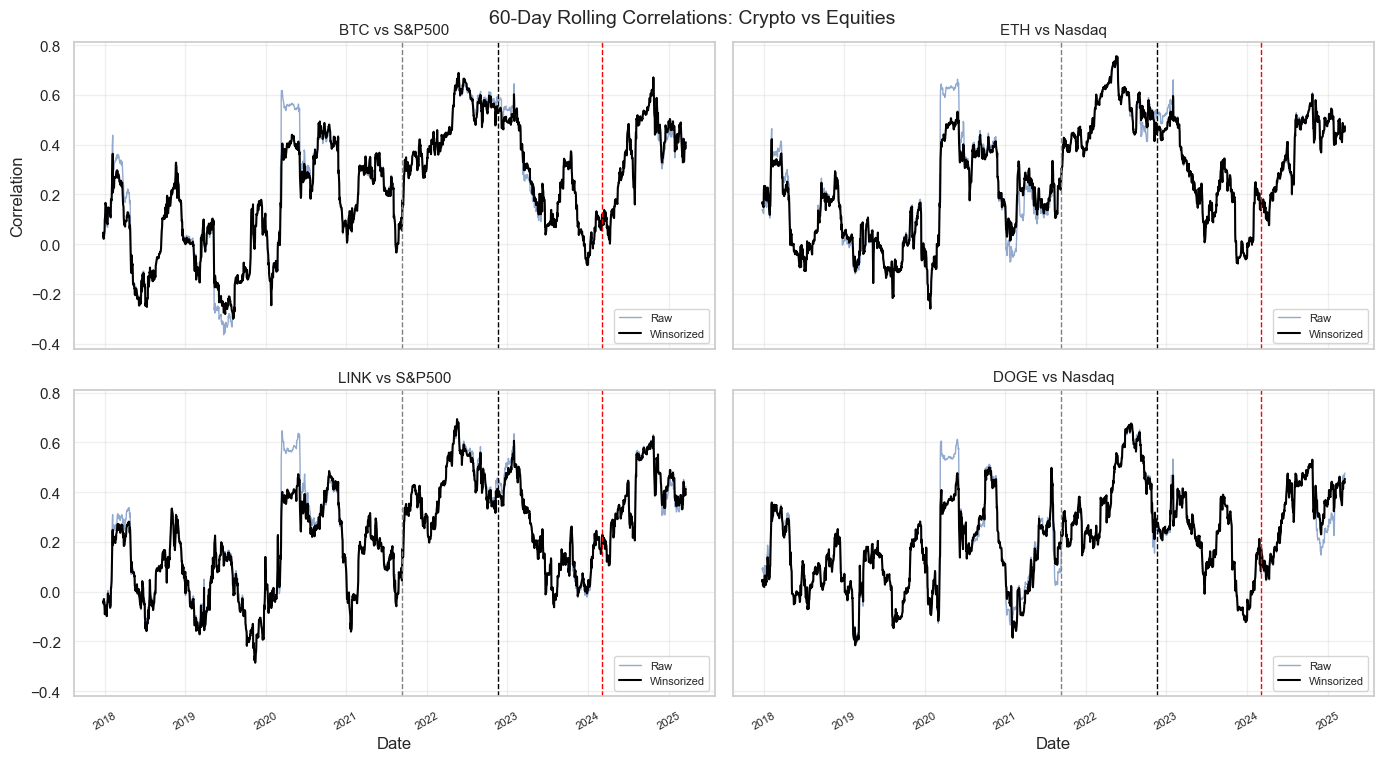

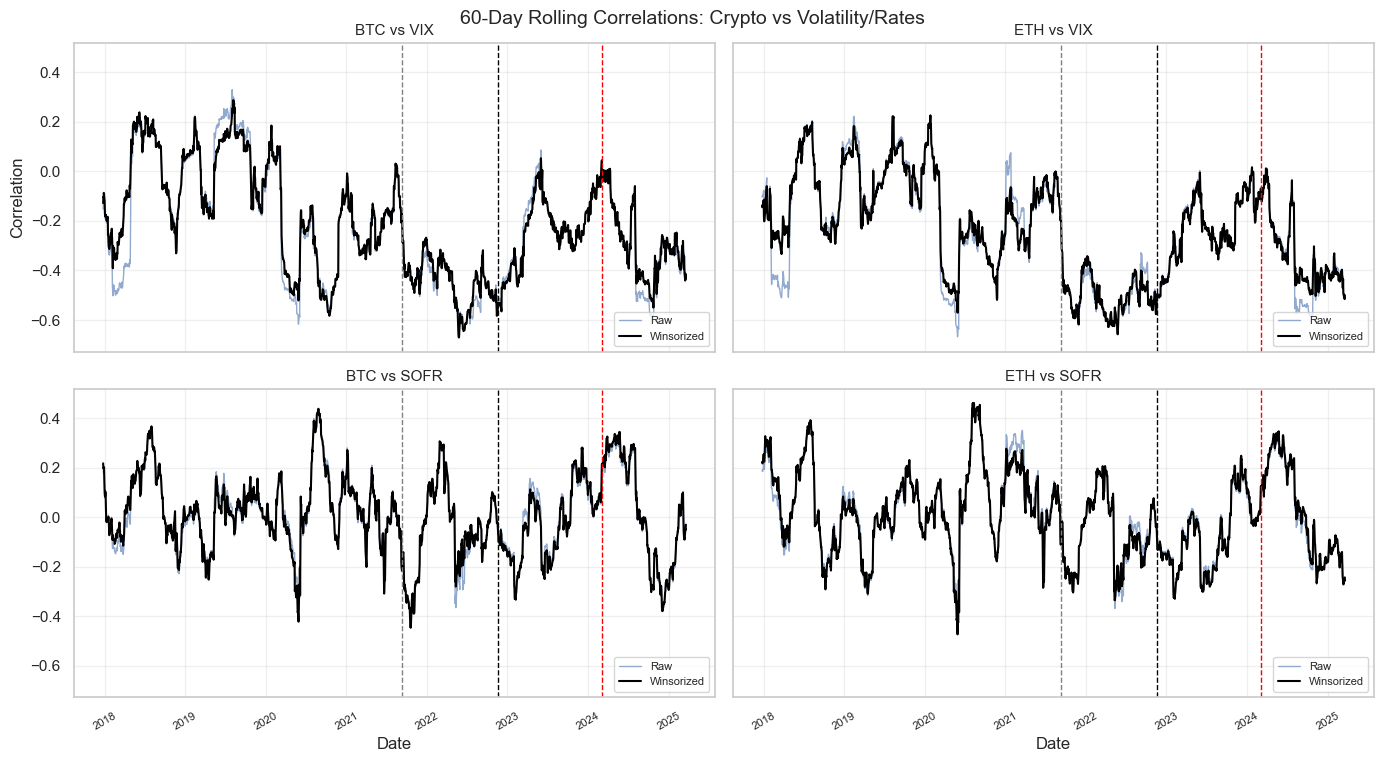

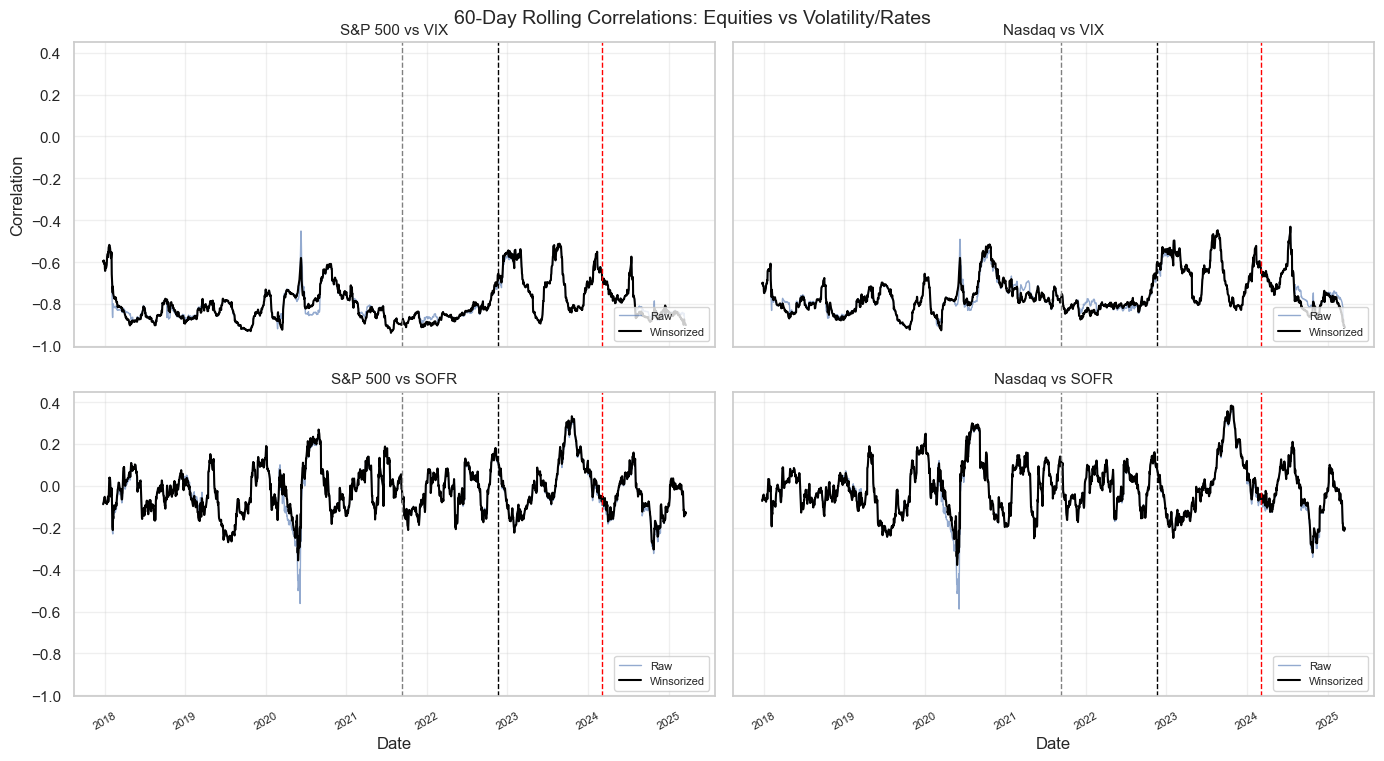

In [28]:
#Rolling correlation:

#We will compute the rolling correlations with the winsorized data 

def plot_rolling_corr(pairs, labels, df_raw, df_win, window, suptitle):
    """
    Draws a 2×2 grid of raw vs. winsorized rolling correlations.
    
    pairs     : list of (col_raw, col_win) tuples
    labels    : list of subplot titles
    df_raw    : DataFrame of raw returns
    df_win    : DataFrame of winsorized returns
    window    : integer rolling window
    suptitle  : overall figure title
    """
    fig, axes = plt.subplots(2, 2, figsize=(14,8), sharex=True, sharey=True)
    axes = axes.flatten()
    
    dates = {
      'PP': pd.to_datetime("2021-09-11"),
      'Tr': pd.to_datetime("2022-11-21"),
      'Rec': pd.to_datetime("2024-03-07")
    }
    
    for ax, (a, b), lbl in zip(axes, pairs, labels):
        rc_raw = df_raw[a].rolling(window).corr(df_raw[b])
        rc_win = df_win[a].rolling(window).corr(df_win[b])
        
        ax.plot(rc_raw, lw=1,   alpha=0.6, label="Raw")
        ax.plot(rc_win, lw=1.5, color='black', label="Winsorized")
        
        # vertical event lines
        ax.axvline(dates['PP'],  color='gray',  ls='--', lw=1)
        ax.axvline(dates['Tr'],  color='black', ls='--', lw=1)
        ax.axvline(dates['Rec'], color='red',   ls='--', lw=1)
        
        ax.set_title(lbl, fontsize=11)
        ax.grid(alpha=0.3)
        ax.legend(loc='lower right', fontsize=8)
        
        locator   = mdates.AutoDateLocator()
        formatter = mdates.ConciseDateFormatter(locator)
        ax.xaxis.set_major_locator(locator)
        ax.xaxis.set_major_formatter(formatter)
        ax.tick_params(axis='x', rotation=30, labelsize=8)
    
    # only label the bottom row and left column
    for ax in axes[2:]:
        ax.set_xlabel("Date", fontsize=12)
    axes[0].set_ylabel("Correlation", fontsize=12)
    
    plt.suptitle(suptitle, fontsize=14, y=0.95)
    plt.tight_layout()
    plt.show()

#---------------------------------------------------------------------------------------------------------------------
window = 60

# Crypto vs Crypto
crypto_pairs = [
    ('BTC-USD/log','ETH-USD/log'),
    ('BTC-USD/log','ADA-USD/log'),
    ('ETH-USD/log','LINK-USD/log'),
    ('DOGE-USD/log','XRP-USD/log'),
]
crypto_labels = [f"{a[:-4]} vs {b[:-4]}" for a,b in crypto_pairs]

plot_rolling_corr(
    pairs     = crypto_pairs,
    labels    = crypto_labels,
    df_raw    = returns_bd,
    df_win    = returns_wins,
    window    = window,
    suptitle  = f"{window}-Day Rolling Correlations: Crypto vs Crypto"
)

#-----------------------------------------------------------------------------
# Crypto vs Equities
ce_pairs = [
    ('BTC-USD/log','SPXT/log'),
    ('ETH-USD/log','XCMP/log'),
    ('LINK-USD/log','SPXT/log'),
    ('DOGE-USD/log','XCMP/log'),
]
ce_labels = ["BTC vs S&P500", "ETH vs Nasdaq", "LINK vs S&P500", "DOGE vs Nasdaq"]

plot_rolling_corr(
    pairs     = ce_pairs,
    labels    = ce_labels,
    df_raw    = returns_bd,
    df_win    = returns_wins,
    window    = window,
    suptitle  = f"{window}-Day Rolling Correlations: Crypto vs Equities"
)
#----------------------------------------------------------------------------------------------------------------

#3) Crypto VS Volatility / Rates:

# ── 3) Crypto vs Volatility & Rates ──

pairs_vol_rate = [
    ('BTC-USD/log', 'VIX/log'),
    ('ETH-USD/log', 'VIX/log'),
    ('BTC-USD/log', 'SOFR/log'),
    ('ETH-USD/log', 'SOFR/log'),
]
labels_vol_rate = [
    "BTC vs VIX",
    "ETH vs VIX",
    "BTC vs SOFR",
    "ETH vs SOFR",
]

plot_rolling_corr(
    pairs    = pairs_vol_rate,
    labels   = labels_vol_rate,
    df_raw   = returns_bd,
    df_win   = returns_wins,
    window   = window,
    suptitle = f"{window}-Day Rolling Correlations: Crypto vs Volatility/Rates"
)

#------------------------------------------------------------------------------------------------------

# ── 4) Equities vs. Volatility & Rates ──

pairs_eq = [
    ('SPXT/log', 'VIX/log'),
    ('XCMP/log','VIX/log'),
    ('SPXT/log', 'SOFR/log'),
    ('XCMP/log','SOFR/log'),
]
labels_eq = [
    "S&P 500 vs VIX",
    "Nasdaq vs VIX",
    "S&P 500 vs SOFR",
    "Nasdaq vs SOFR",
]

plot_rolling_corr(
    pairs    = pairs_eq,
    labels   = labels_eq,
    df_raw   = returns_bd,
    df_win   = returns_wins,
    window   = window,
    suptitle = f"{window}-Day Rolling Correlations: Equities vs Volatility/Rates"
)


KEY POINTS: 

1) Cryptos VS Cryptos :

The correlation is very high almost all the time, we get almost zero diversification benefit, (aside from meme coin) in a risk‑parity or minimum‑variance portfolio. Crisis and recoveries show up as dips and spikes, during the crash (between datePP -> dateTr windows), correlation surge even higher. Around the recovery date (march 24) we see a slight decoupling with correlation dips back down at almost 0,7. During market stress, cryptos behavee almost similarly (correlatino close to 1). This correlation decrease during calm or recovery phases. 

In early 2018–19, crypto correlations were low, around 0.2–0.4, meaning coins mostly moved on their own rather than in lockstep. This early stage reflect a still immature fragmented market. When we include that 2018–19 window in our full‑sample correlation, those low 0.2–0.4 days pulls mechanically the overall correlation down.

2) Crypto VS Equities:

For all four pairings, crypto–equity correlations generally sit between –0.2 and +0.6 and almost never break above 0.6—meaning Bitcoin, Ethereum, LINK, and DOGE usually move quite independently of US stocks.

3) CRYPTO VS VIX/RATES:

Bitcoin and Ether usually move in the opposite direction of stock market volatility (as measured by VIX), and this inverse relationship becomes even stronger during times of market panic or major downturns. Their correlation with SOFR oscillates around zero, turning mildly positive in crypto rallies and dipping negative during stress episodes.

4) Equitites VS VIX/RATES:

The S&P 500 and Nasdaq tend to decline when market volatility (VIX) increases, showing a strong and consistent inverse relationship. However, their relationship with SOFR is generally weak (around zero), but becomes slightly positive during peak tightening cycles and slightly negative during market sell-offs.

C)
i)
Price indices only reflect changes in the level of the index (capital gains). However, total‐return indices include dividends (or other distributions) reinvested back into the index, which give the actual wealth growth an investor would realize. Over long time horizons, the total return series will show higher compounded returns compared with the price index (which underestimates real growth), thanks to reinvested dividends (or other distributions). Moreover, the day‐to‐day volatility of a total‐return index (around ex dividend date) may be lower than that of a price index, since dividends smooth out part of the capital‐gain swings (they offset the drop in price on ex‐dividend dates). However, over months or years, total return indices exhibit higher mean and higher variance because dividends are reinvested. So yes, this matters in general, especially if we care about reflecting investor wealth growth.

ii)

Risk based portfolio optimization will optimize w.r.t. the variance covariance matrix. In our crypto/equity setup, using total return indices ensures that cryptocurrency returns (already total return since no dividends) and equity returns are both measured on their full investor return (including distributions). This would not be true if we had used equity price‐only series. Total‐return indices smooth out the mechanical volatility spikes on ex-dividend dates and incorporate the extra variance from dividend compounding, resulting in a cleaner, economically meaningful variance–covariance matrix and risk–based allocations that reflect the true, tradeable risks of equities versus crypto.